# EDA for old song list output vars

In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import pylab 
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions

#nltk imports
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
#create a df from csv
filename = "/Users/gautham/Documents/Documents - gBookPro/Berkeley MIMS/Semester 1/256 - ANLP/anlp21-project/TopicModeling/data/full_df.csv"
lyrics_df= pd.read_csv(filename)
lyrics_df.rename(columns={ 'Unnamed: 0': 'track_name'}, inplace=True)
lyrics_df.drop('Unnamed: 0.1', inplace=True, axis=1)
lyrics_df.head()

track_name  playlist_name             playlist_id playlist_genre  \
0         Back In Black  Rock Classics  37i9dQZF1DWXRqgorJj26U           Rock   
1         Paradise City  Rock Classics  37i9dQZF1DWXRqgorJj26U           Rock   
2              Dream On  Rock Classics  37i9dQZF1DWXRqgorJj26U           Rock   
3                 Creep  Rock Classics  37i9dQZF1DWXRqgorJj26U           Rock   
4  Don't Stop Believin'  Rock Classics  37i9dQZF1DWXRqgorJj26U           Rock   

                 track_id track_artist_name         track_artist_id  \
0  08mG3Y1vljYA6bvDt4Wqkj             AC/DC  711MCceyCBcFnzjGY4Q7Un   
1  3YBZIN3rekqsKxbJc9FZko     Guns N' Roses  3qm84nBOXUEQ2vnTfUTTFC   
2  5MxNLUsfh7uzROypsoO5qe         Aerosmith  7Ey4PD4MYsKc5I2dolUwbH   
3  70LcF31zb1H0PyJoS1Sx1r         Radiohead  4Z8W4fKeB5YxbusRsdQVPb   
4  4bHsxqR3GMrXTxEPLuK5ue           Journey  0rvjqX7ttXeg3mTy8Xscbt   

   danceability  energy  key  loudness  mode  acousticness  valence    tempo  \
0         0.310   0.700    9    -5.678     1        0.0110    0.763  188.386   
1         0.273   0.952   11    -8.762     1        0.0169    0.472  100.271   
2         0.307   0.433    1   -10.057     1        0.3880    0.224  160.900   
3         0.515   0.430    7    -9.935     1        0.0097    0.104   91.844   
4         0.500   0.748    4    -9.072     1        0.1270    0.514  118.852   

                                                tabs  \
0  E,D,A/C#,E,D,A/C#,E,D,A/C#,E,D,A/C#,E,D,A/C#,A...   
1  G,C,F,C,G,G5,F5,C5,Bb5,C5,C5,Bb5,G,F,G,G,G,C,C...   
2  Fm,Fm6,Bbm6,Fm,C7sus,Fm,Fm,Fm7,Fm6,Bbm6,Fm,Fm7...   
3  G,B,C,Cm,G,B,C,Cm,G,B,C,Cm,G,B,C,Cm,G,B,C,Cm,G...   
4  E,B,C#m,A,E,B,G#m,A,E,B,C#m,A,E,B,G#m,A,E,B,C#...   

                                        dirty_lyrics  
0  [Verse 1]\nBack in black, I hit the sack\nI've...  
1  [Chorus]\nTake me down to the Paradise City\nW...  
2  [Verse 1]\nEvery time​ that I look in the mirr...  
3  [Verse 1]\nWhen you were here before\nCouldn't...  
4  [Verse 1]\nJust a small-town girl\nLivin' in a...

In [4]:
#use length to filter out non-lyrics
lyrics_df['len'] = None
lyrics_df['len'] = lyrics_df['dirty_lyrics'].apply(lambda x: len(str(x)))
lengths = list(lyrics_df['len'])
percentiles = [90, 91, 92, 93, 94, 95, 99]
for p in percentiles:
    print(np.percentile(lengths, p))

3092.0
3246.0
3580.0
3853.0
4322.0
5001.0
89514.0


1564
1701


(array([ 68.,  44., 188., 391., 388., 248., 121.,  56.,  36.,  24.]),
 array([3.0000e+00, 3.5780e+02, 7.1260e+02, 1.0674e+03, 1.4222e+03,
        1.7770e+03, 2.1318e+03, 2.4866e+03, 2.8414e+03, 3.1962e+03,
        3.5510e+03]),
 <BarContainer object of 10 artists>)

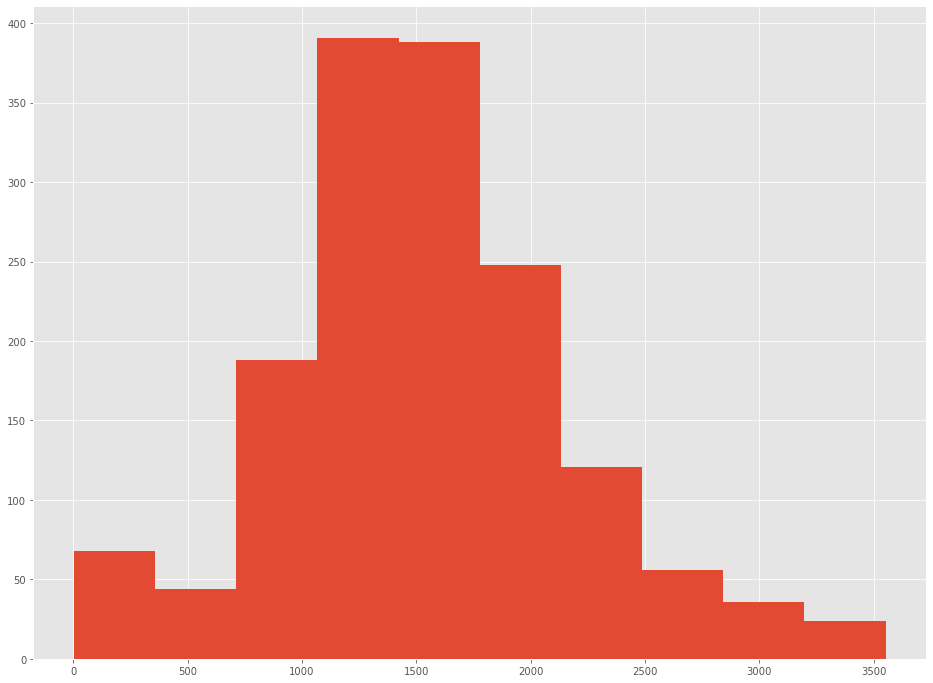

In [5]:
ldf = lyrics_df.loc[lyrics_df.len < np.percentile(lengths, 92)]
print(len(ldf))
print(len(lyrics_df))
plt.hist(ldf.len, bins=10)

In [6]:
#drop NAs from lyrics col
print(ldf.shape)
ldf = ldf[ldf['dirty_lyrics'].notna()]
ldf.reset_index(drop=True, inplace=True)
print(ldf.shape)
ldf = ldf.drop(ldf.index[776])
print(ldf.shape)

(1564, 18)
(1496, 18)
(1495, 18)


# Plotting Genre Distribution in Dataset

In [7]:
ldf.columns

Index(['track_name', 'playlist_name', 'playlist_id', 'playlist_genre',
       'track_id', 'track_artist_name', 'track_artist_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo',
       'tabs', 'dirty_lyrics', 'len'],
      dtype='object')

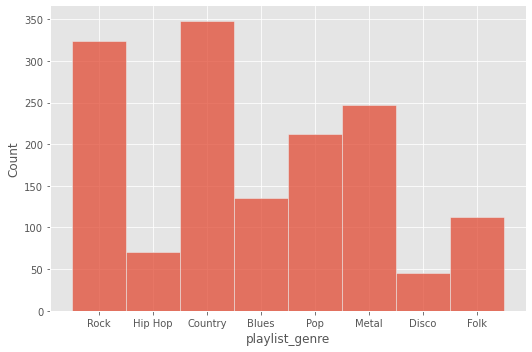

In [8]:
sns.displot(data=ldf, x='playlist_genre', aspect=1.5, stat='count')

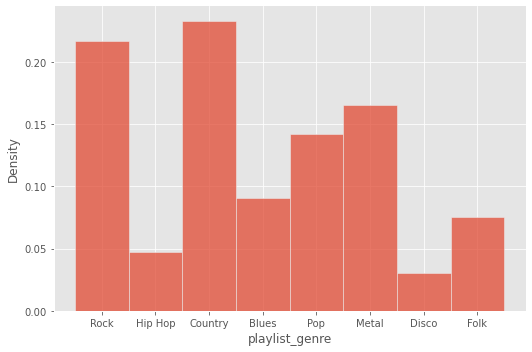

In [9]:
sns.displot(data=ldf, x='playlist_genre', aspect=1.5, stat='density')

# Plotting predicted variable distributions

Source: 
1. https://towardsdatascience.com/10-examples-to-master-distribution-plots-with-python-seaborn-4ea2ceea906a
2. https://www.c-sharpcorner.com/article/a-complete-python-seaborn-tutorial/

In [10]:
vars = ldf.columns.to_list()
vars = vars[7:15]
vars

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'acousticness',
 'valence',
 'tempo']

### Histogram

In [11]:
#https://stackoverflow.com/questions/69059121/how-to-draw-a-normal-curve-on-seaborn-displot
def map_pdf(x, **kwargs):
    mu, std = scipy.stats.norm.fit(x)
    x0, x1 = p1.axes[0][0].get_xlim()  # axes for p1 is required to determine x_pdf
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    plt.plot(x_pdf, y_pdf, c='r')

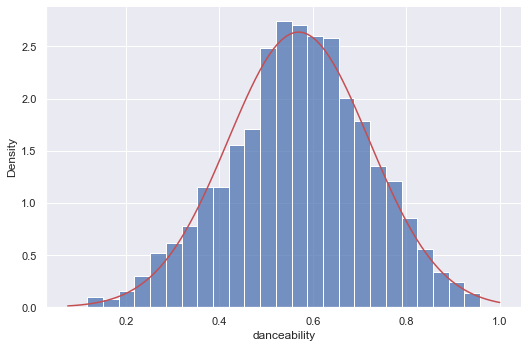

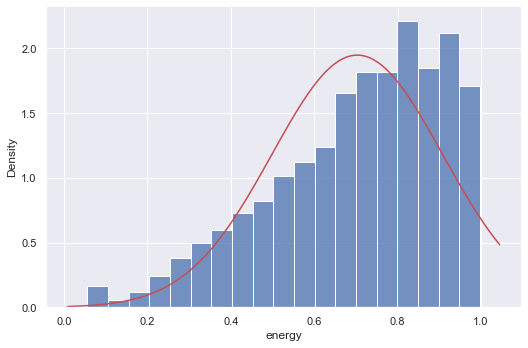

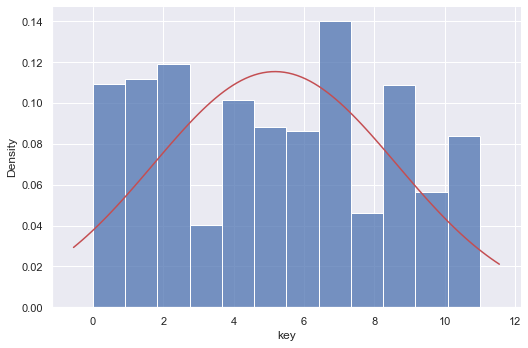

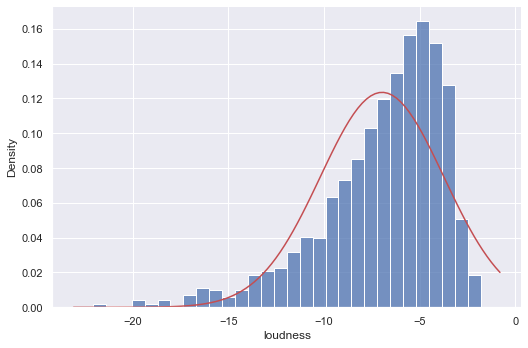

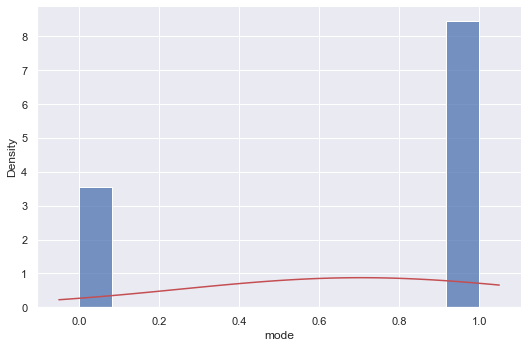

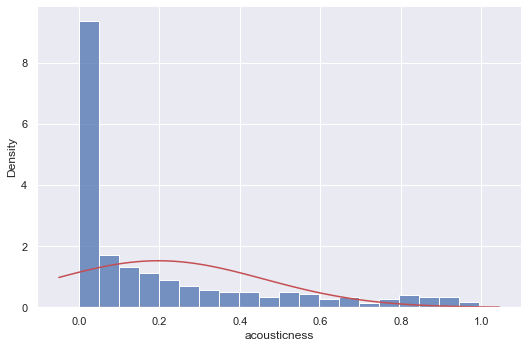

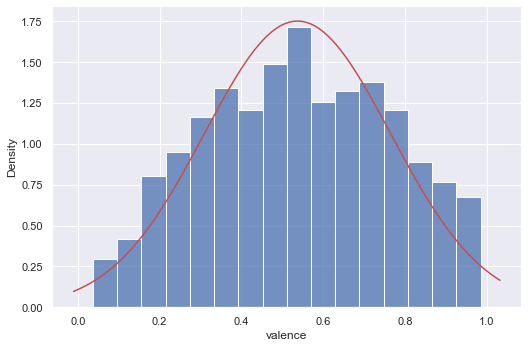

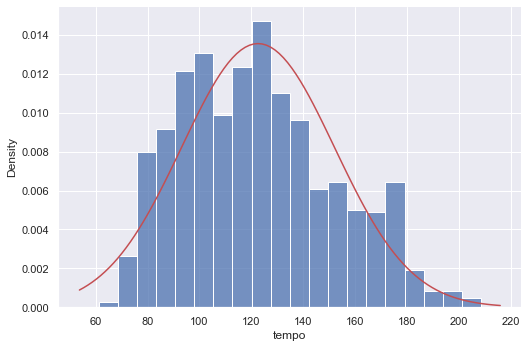

In [12]:
sns.set_theme()
for var in vars:
    p1 = sns.displot(data=ldf, x=var, aspect=1.5, stat='density')
    p1.map(map_pdf, var)

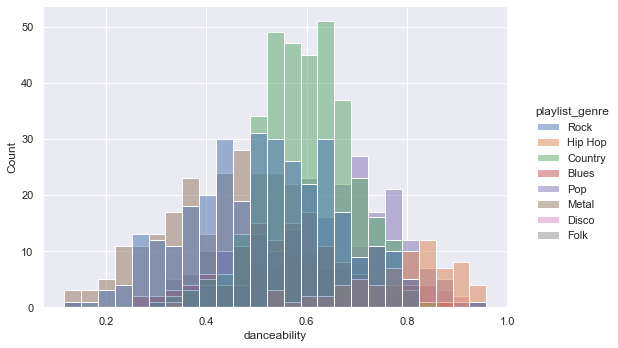

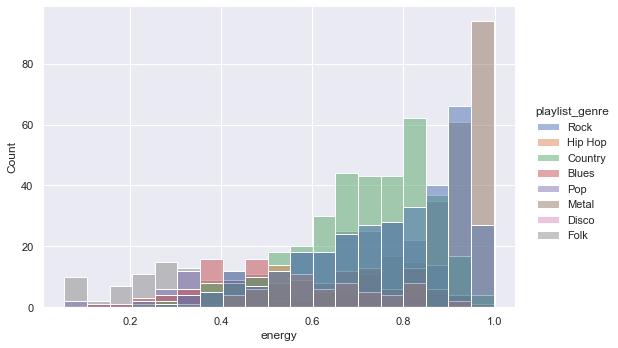

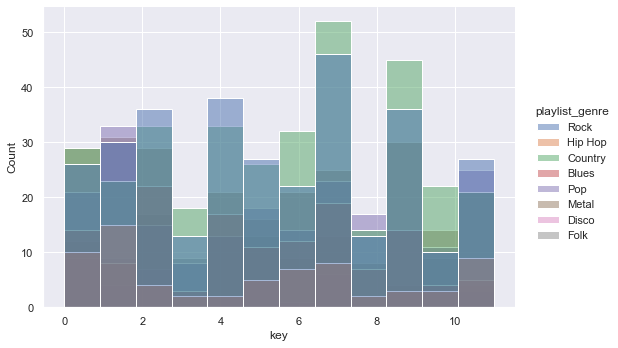

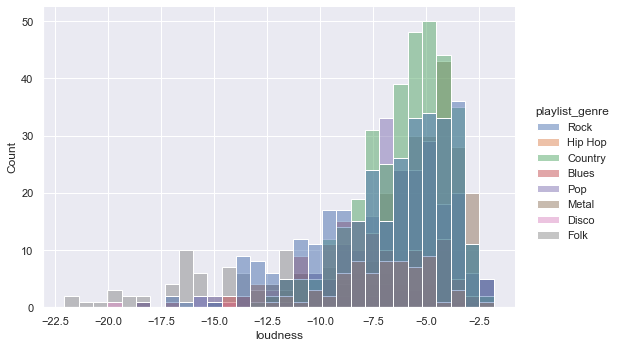

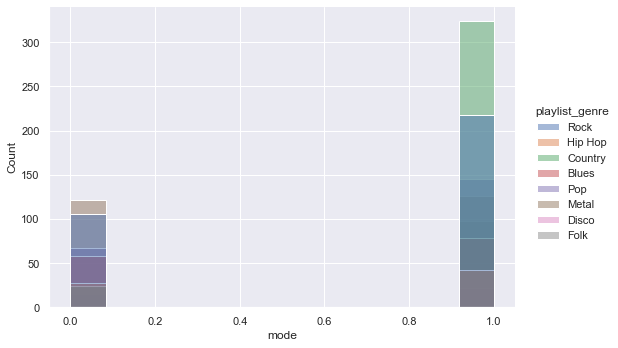

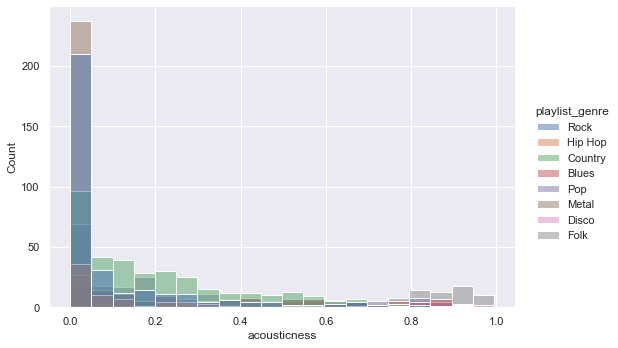

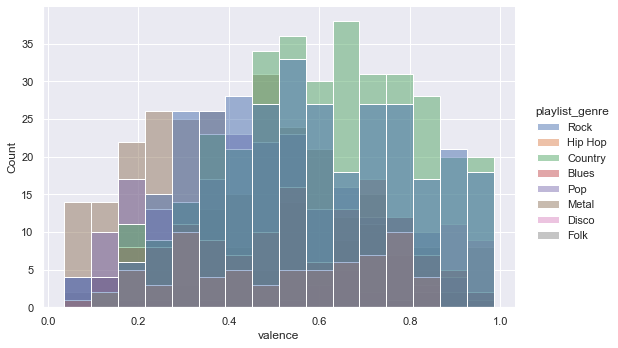

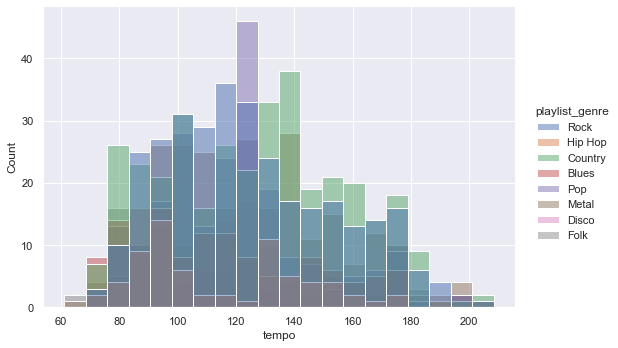

In [13]:
for var in vars:
    sns.displot(data=ldf, x=var, hue='playlist_genre', kind='hist', aspect=1.5)

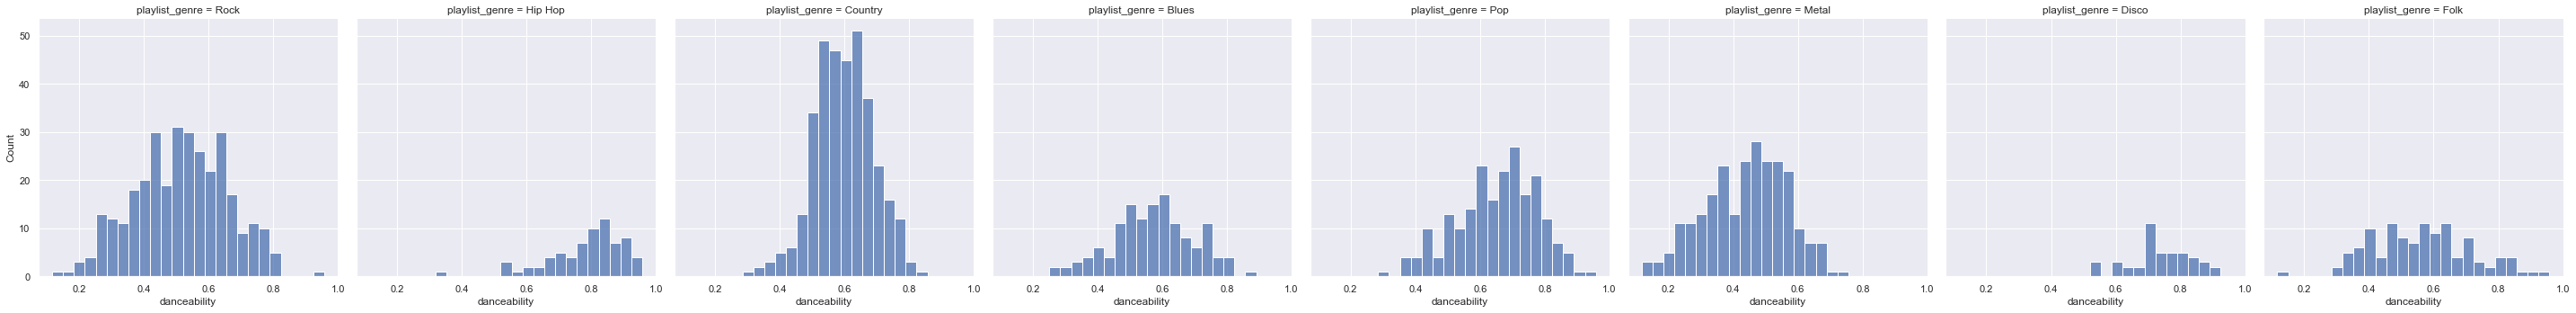

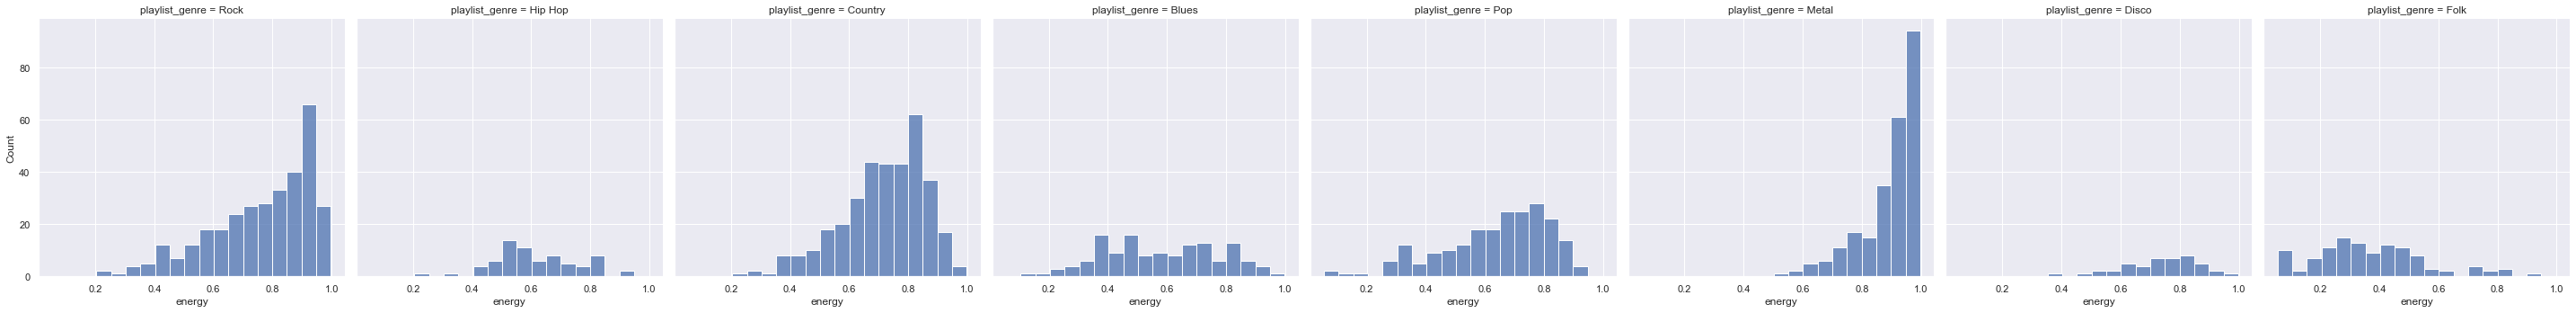

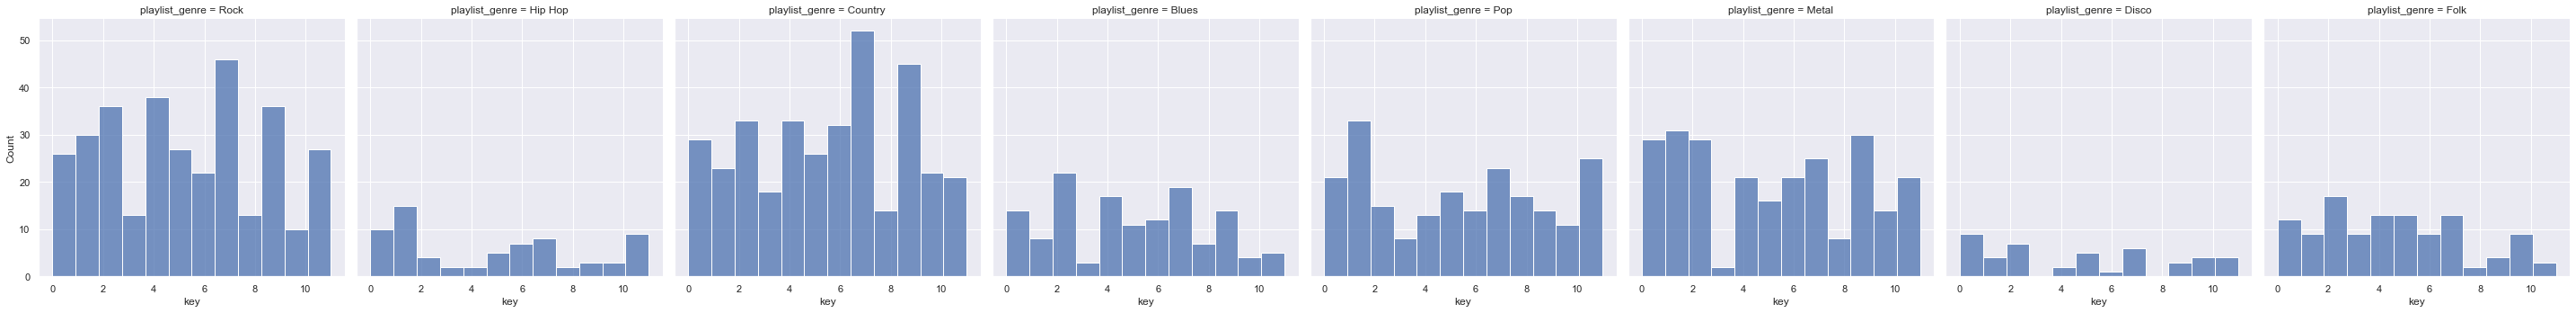

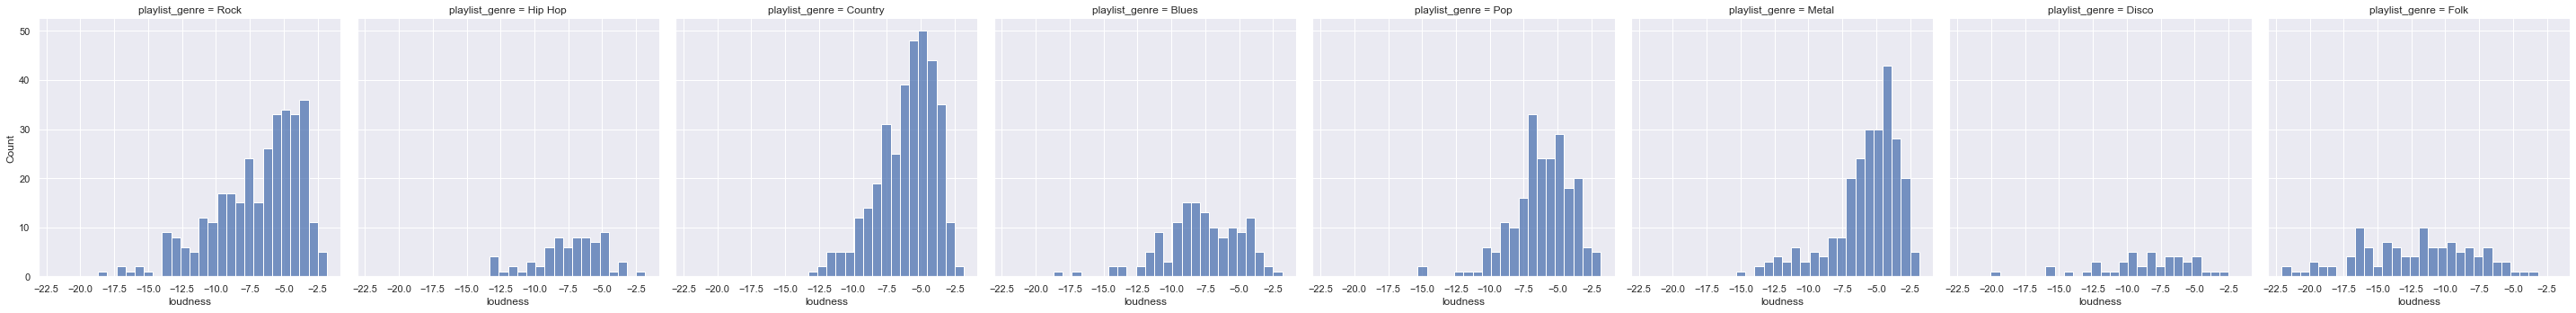

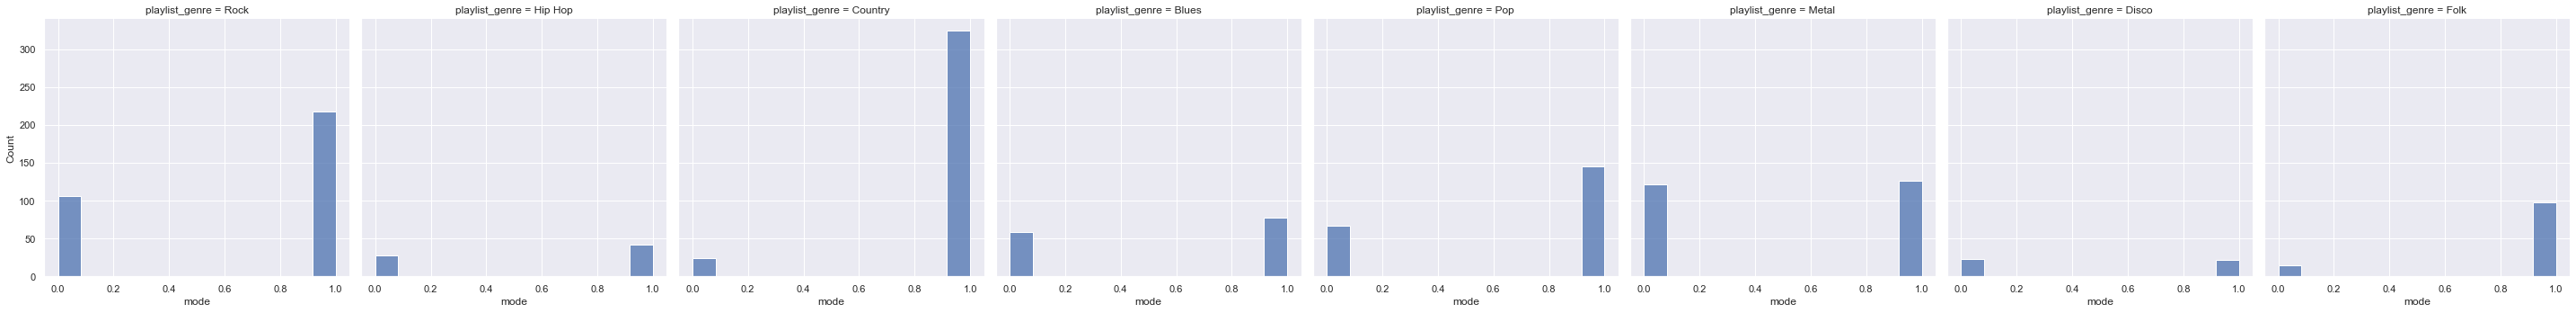

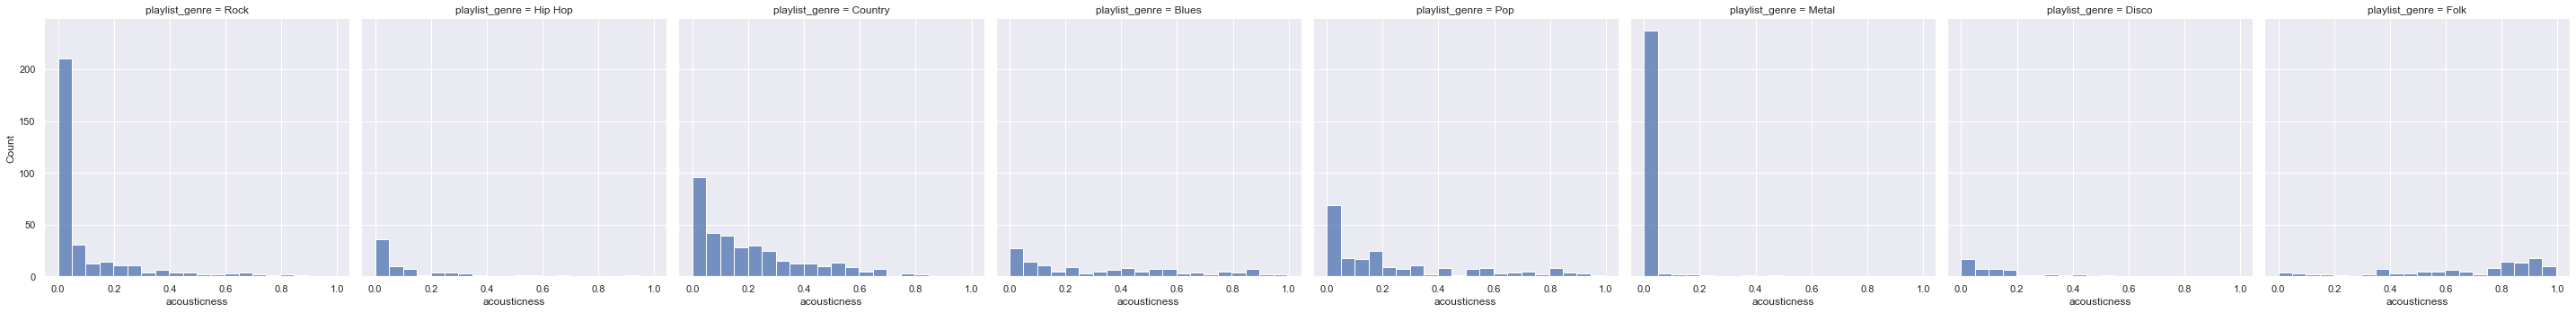

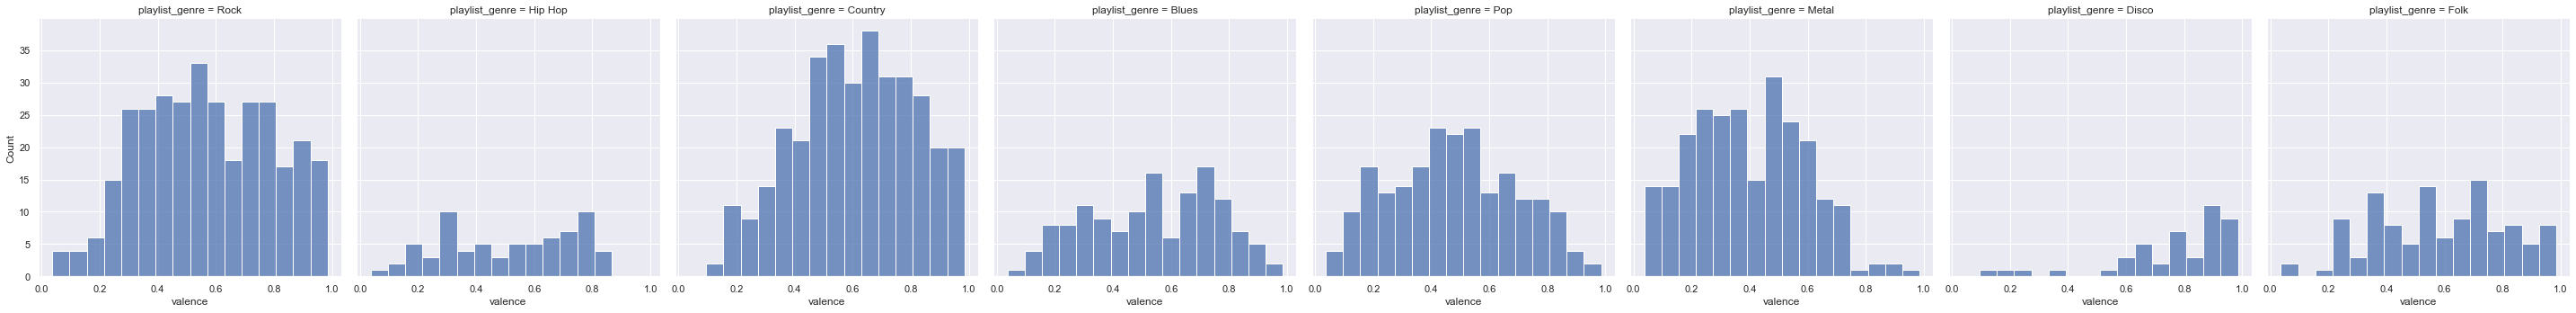

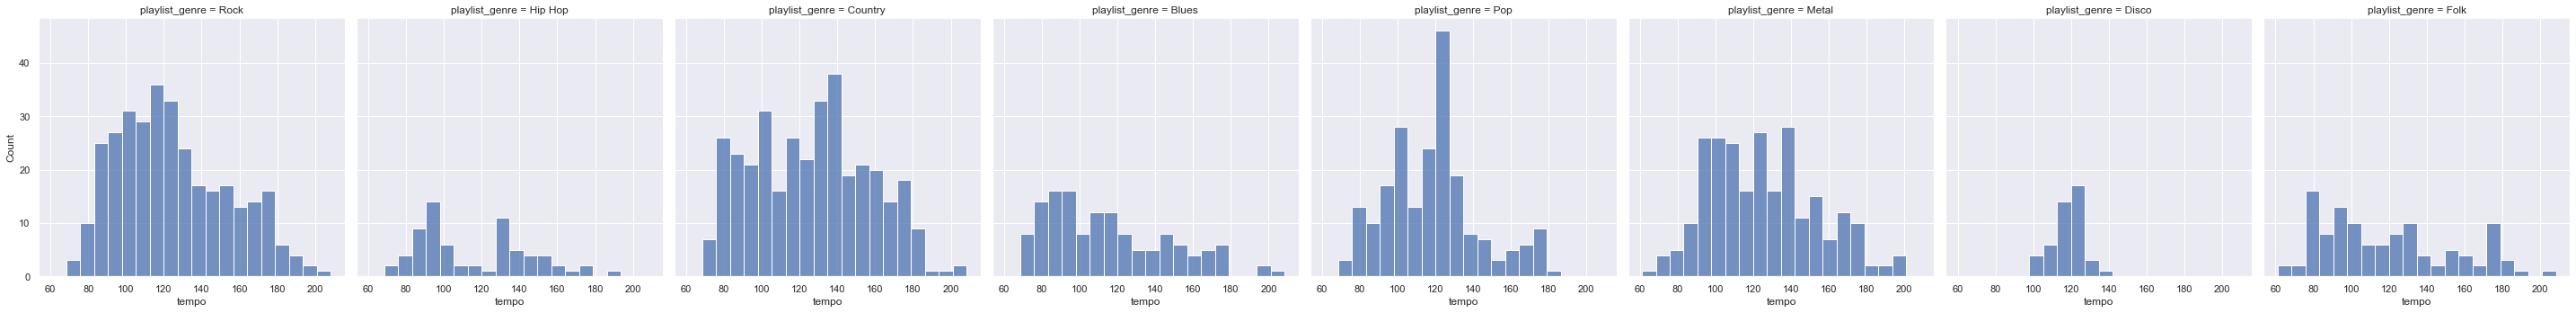

In [14]:
for var in vars:
    sns.displot(data=ldf, x=var, col='playlist_genre', kind='hist', aspect=1)

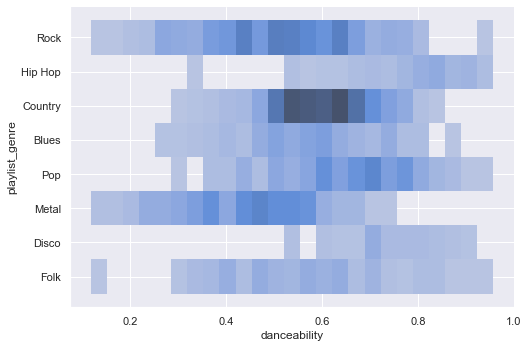

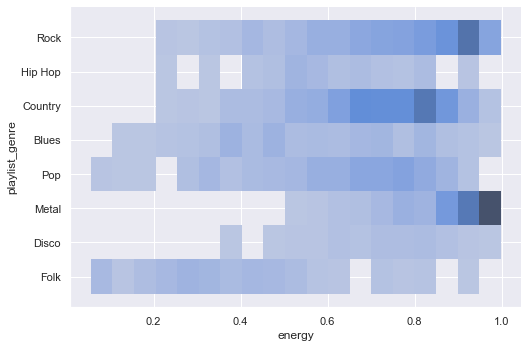

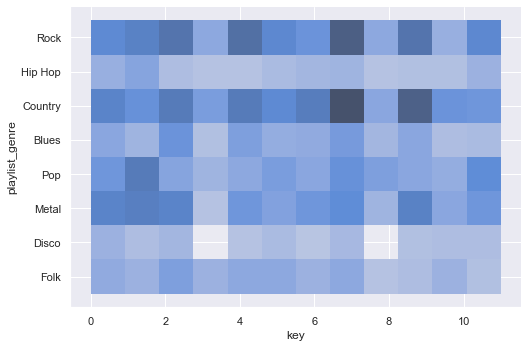

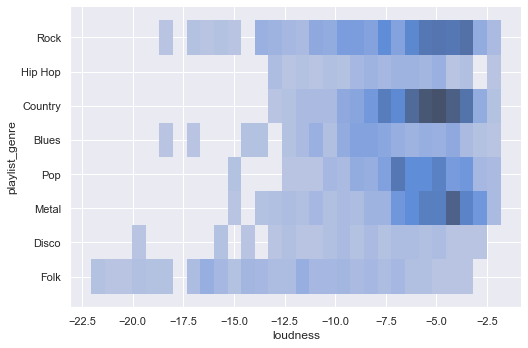

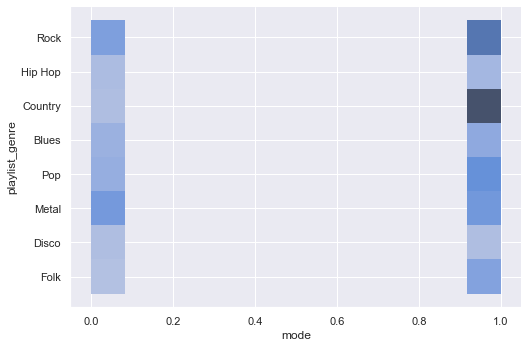

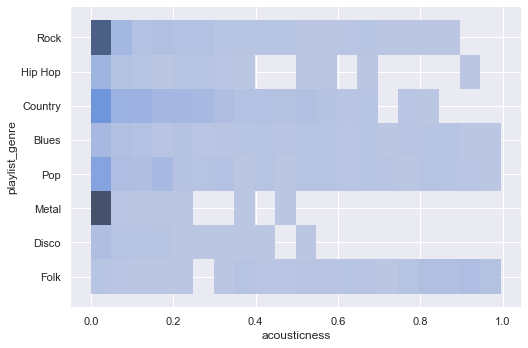

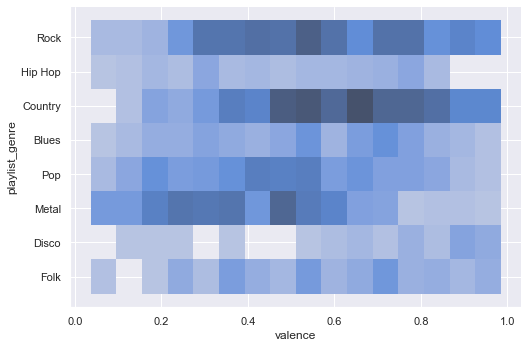

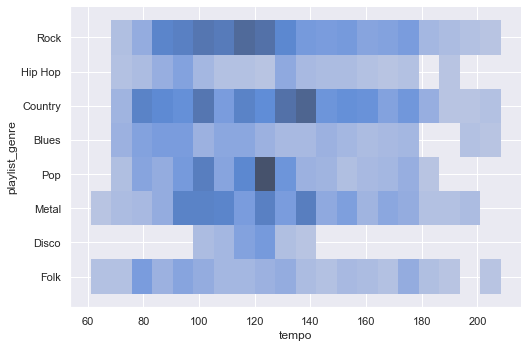

In [15]:
for var in vars:
    sns.displot(data=ldf, x=var, y='playlist_genre', kind='hist', aspect=1.5)

### KDE

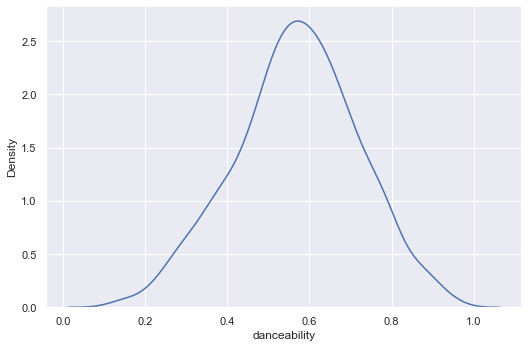

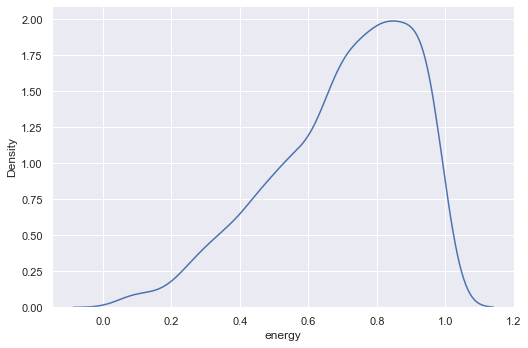

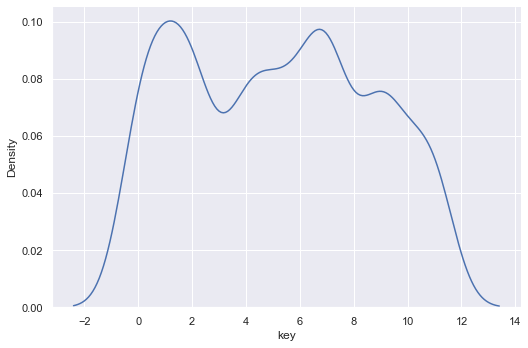

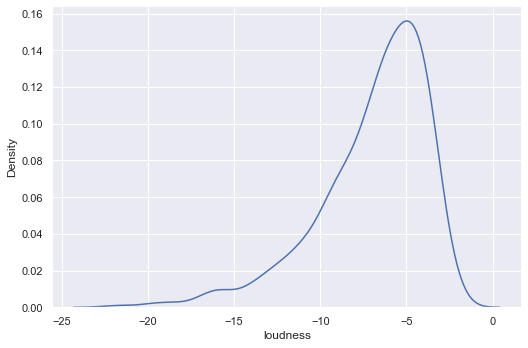

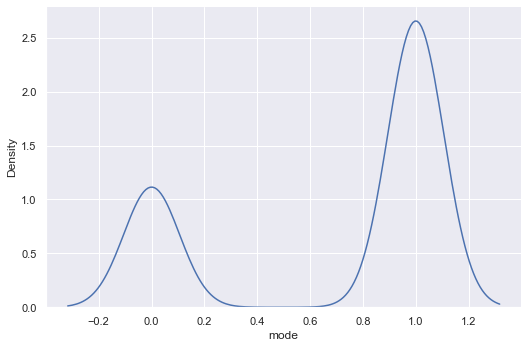

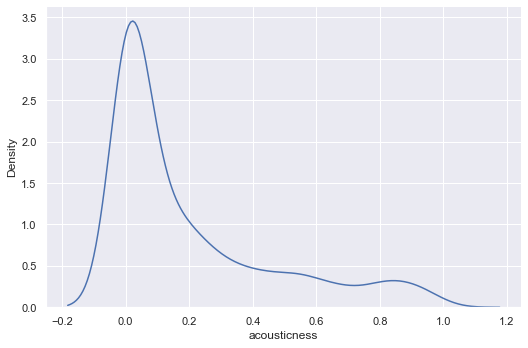

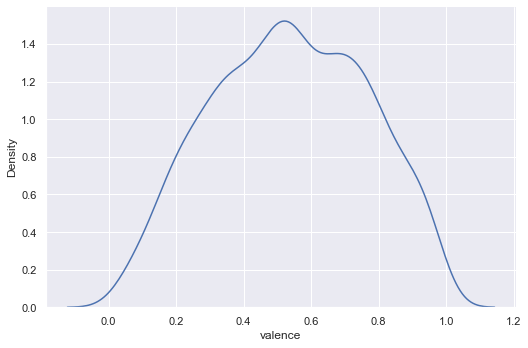

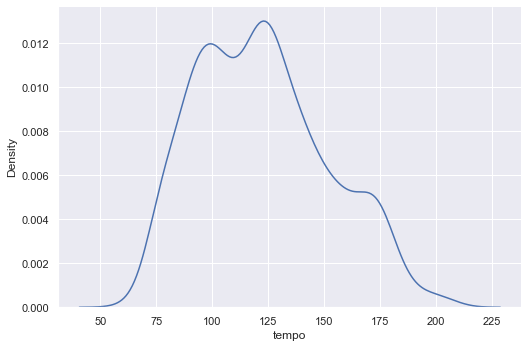

In [16]:
for var in vars:
    sns.displot(data=ldf, x=var, kind='kde', aspect=1.5)

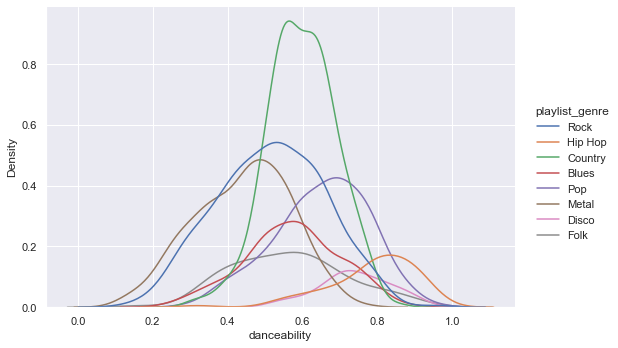

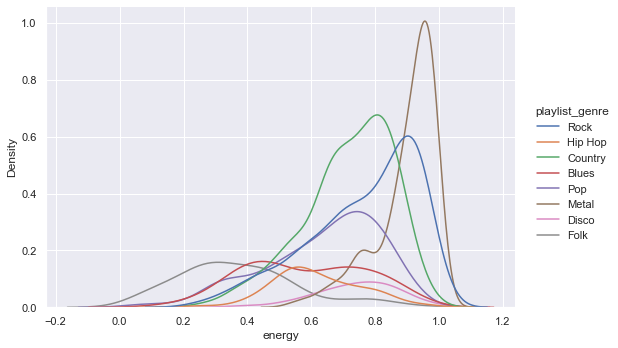

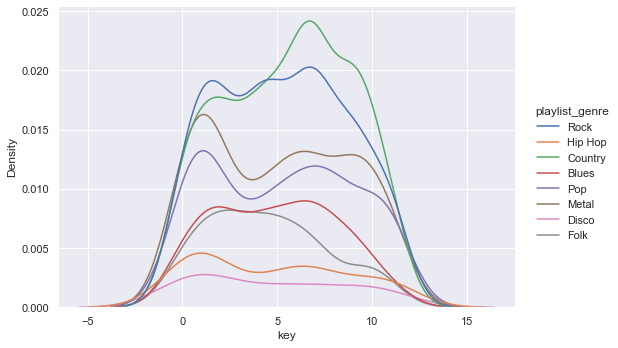

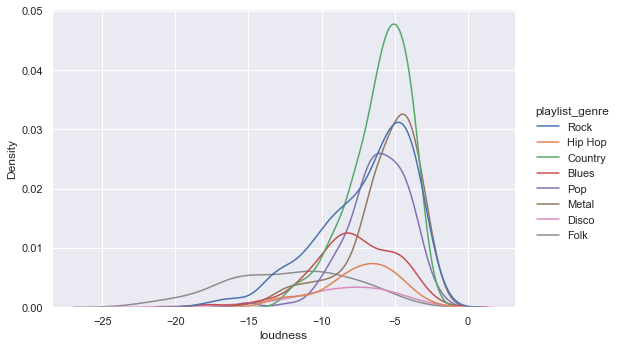

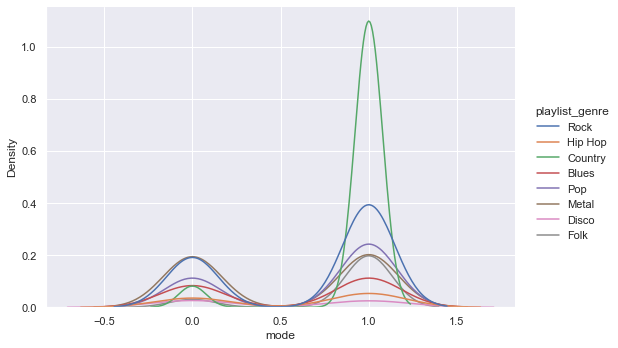

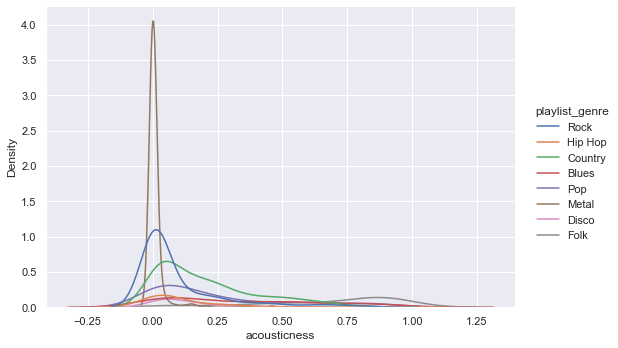

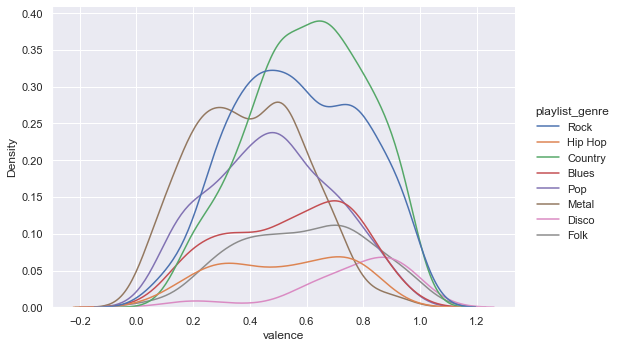

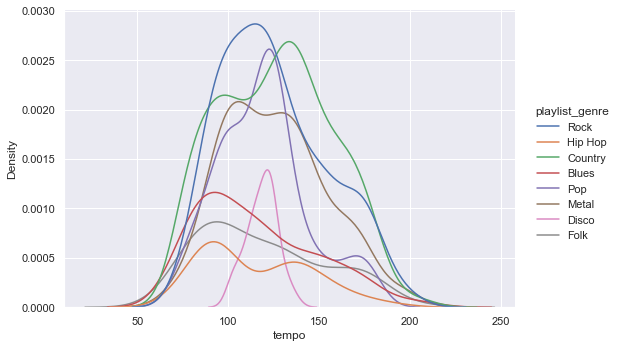

In [17]:
for var in vars:
    sns.displot(data=ldf, x=var, hue='playlist_genre', kind='kde', aspect=1.5)

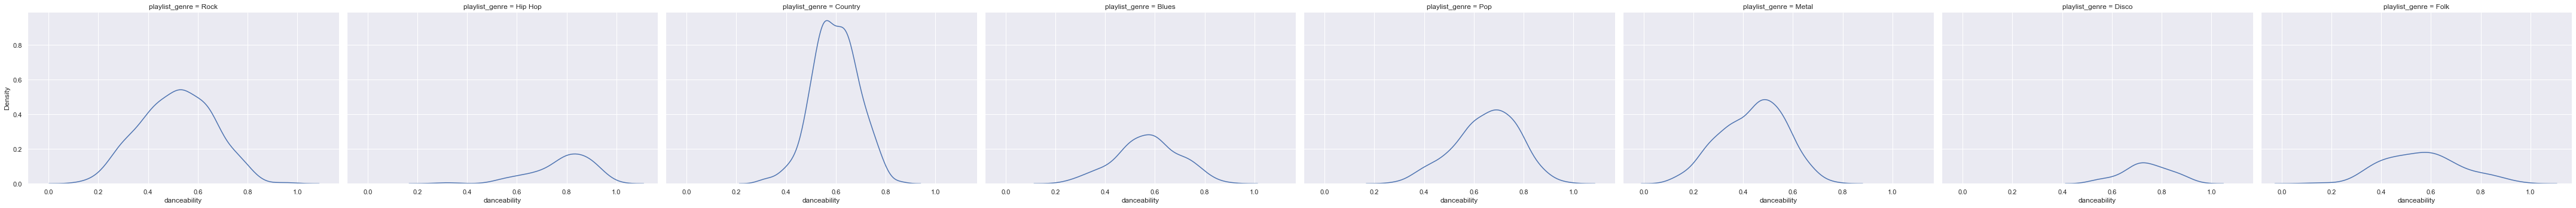

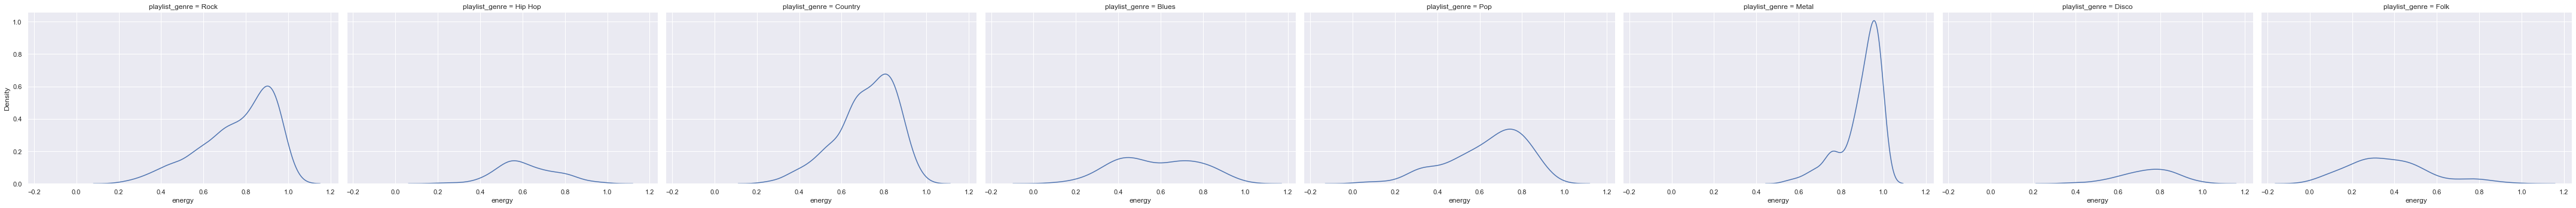

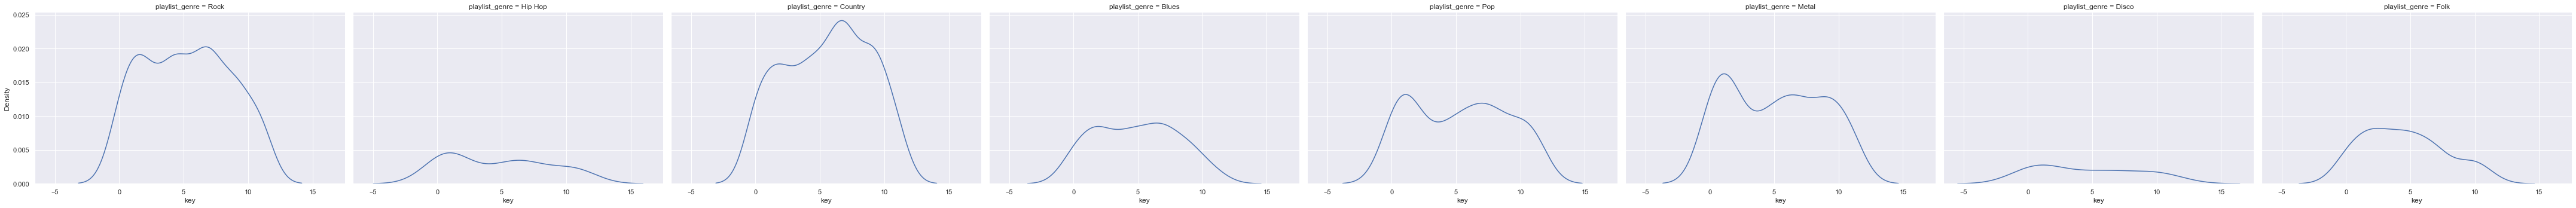

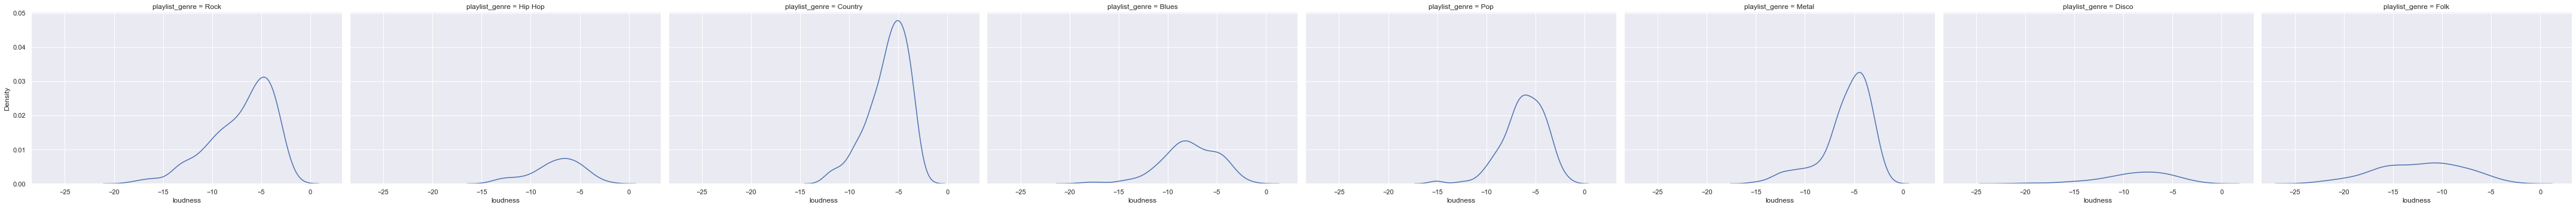

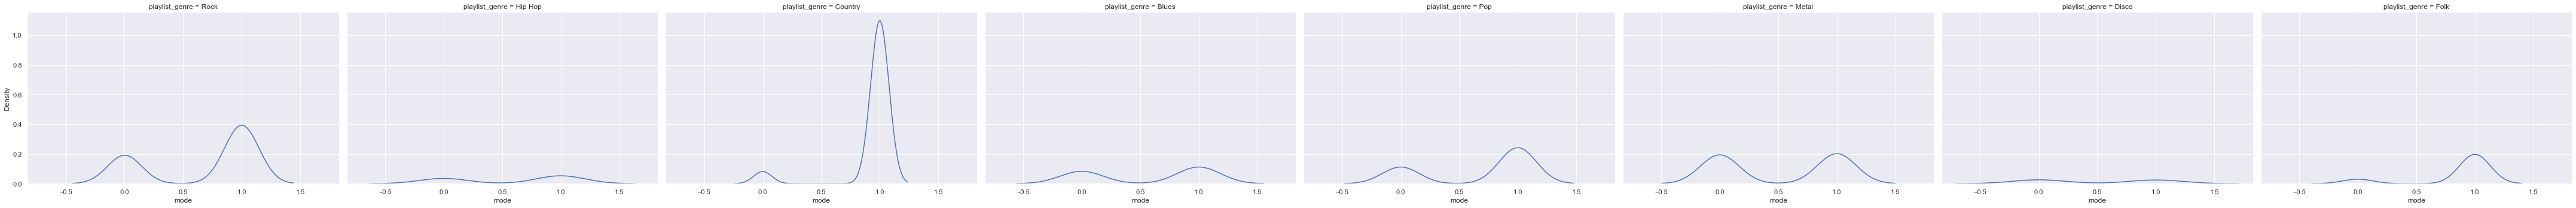

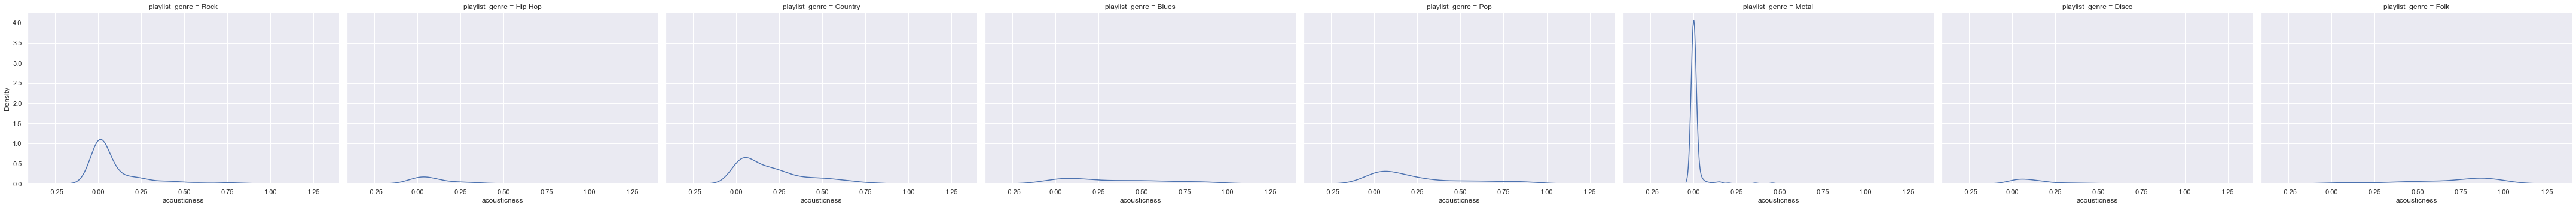

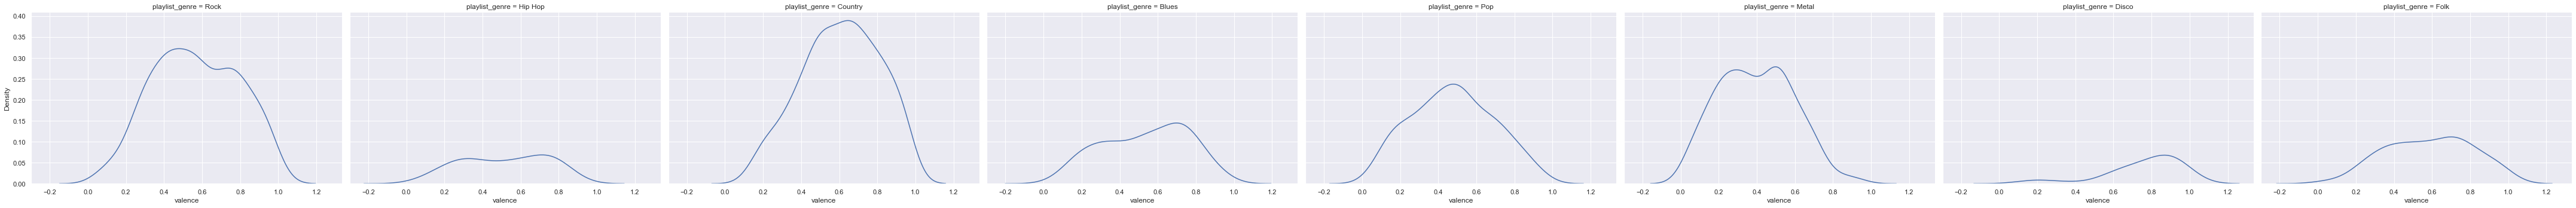

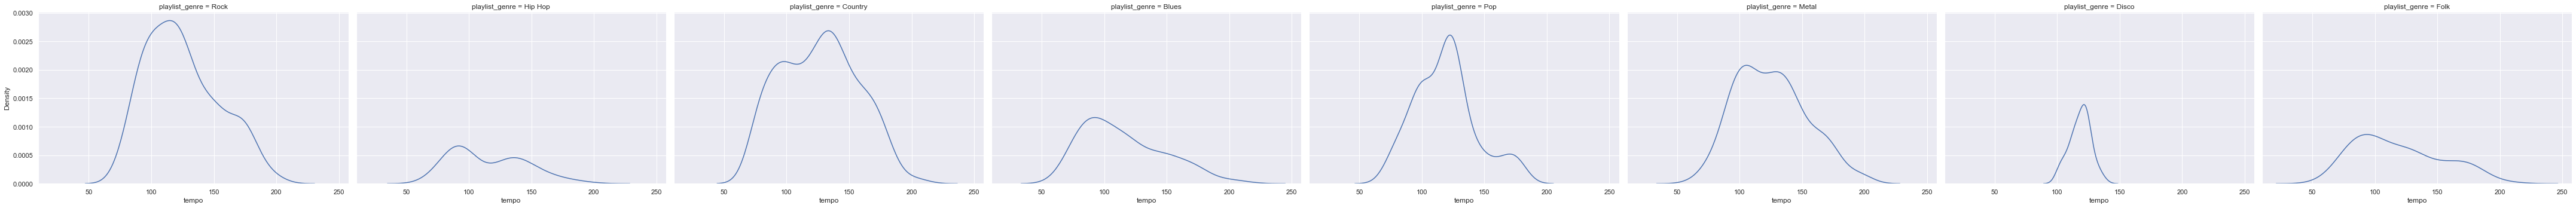

In [18]:
for var in vars:
    sns.displot(data=ldf, x=var, col='playlist_genre', kind='kde', aspect=1.5)

### ECDF

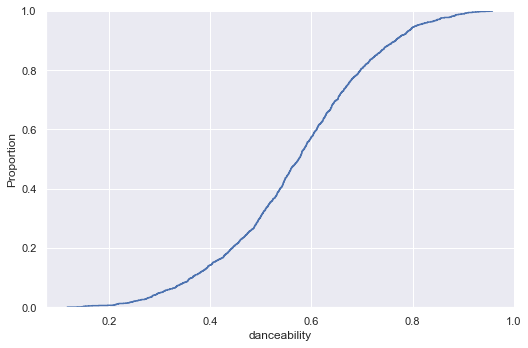

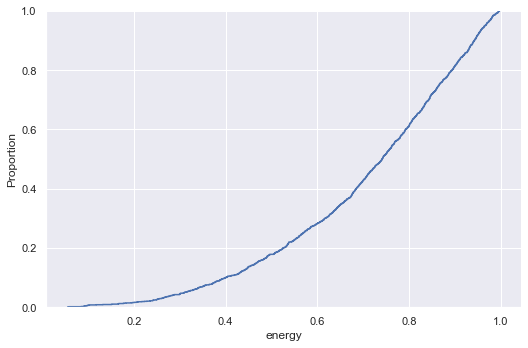

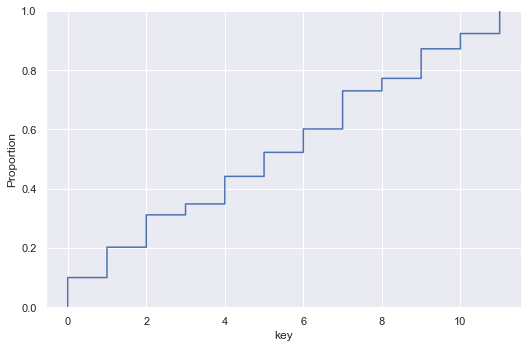

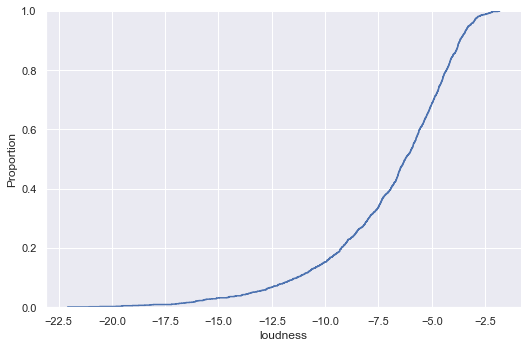

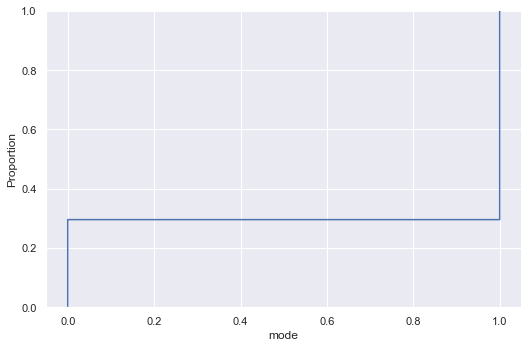

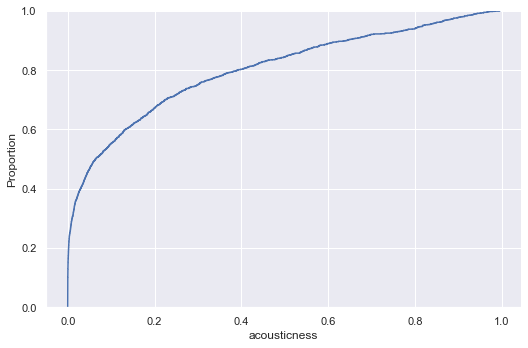

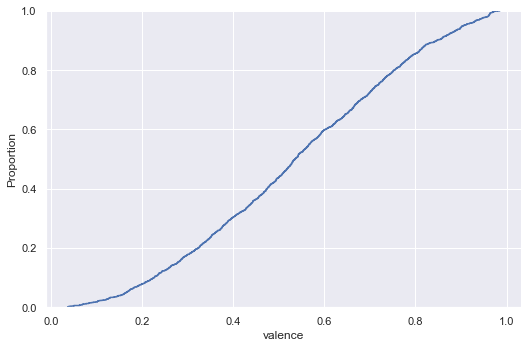

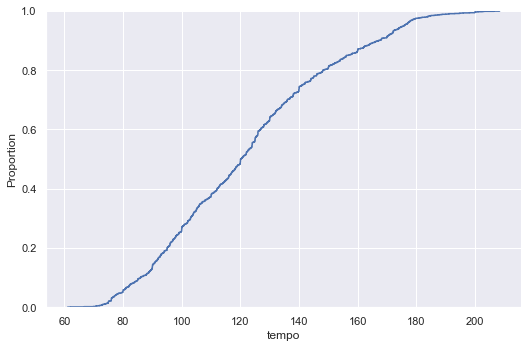

In [19]:
for var in vars:
    sns.displot(data=ldf, x=var, kind='ecdf', aspect=1.5)

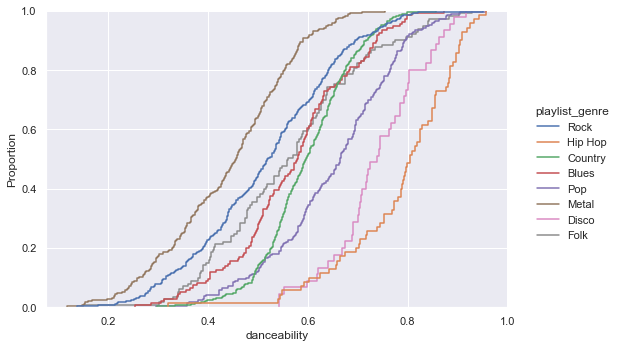

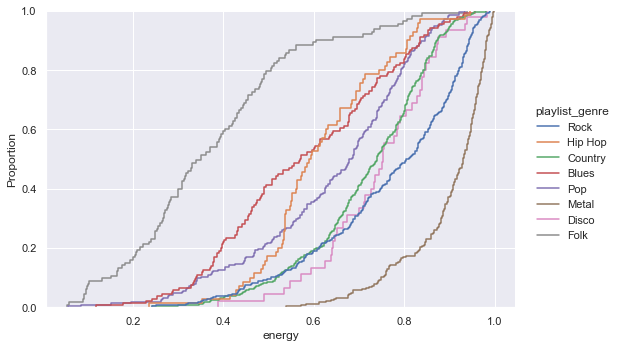

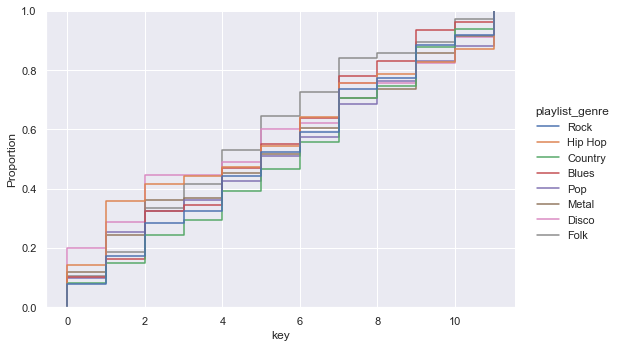

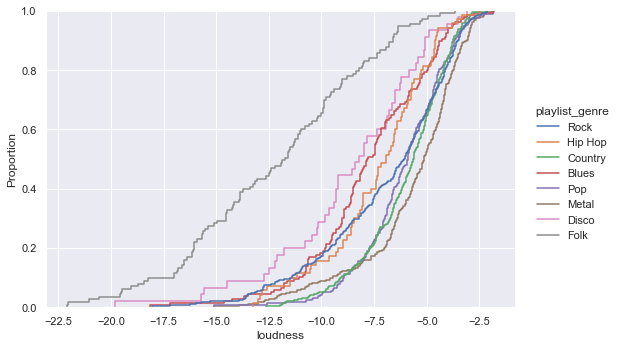

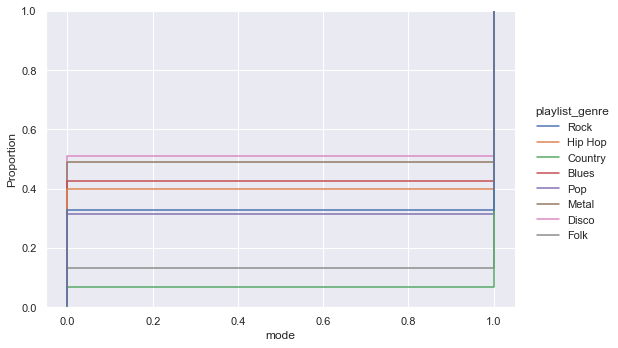

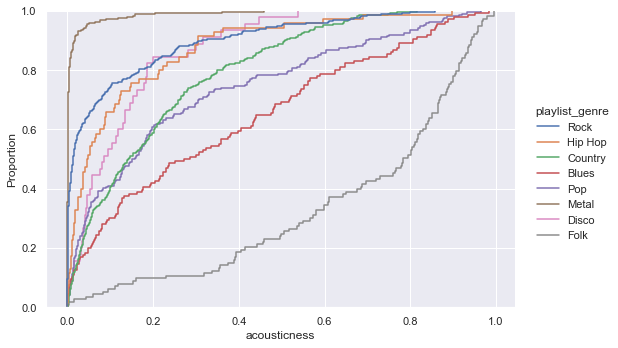

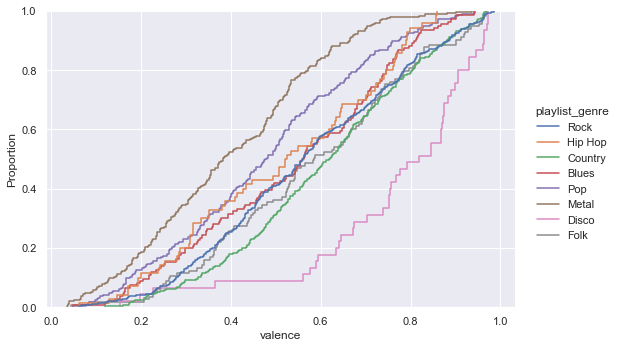

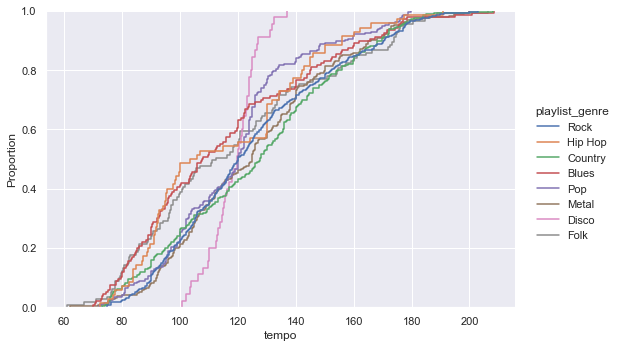

In [20]:
for var in vars:
    sns.displot(data=ldf, x=var, hue='playlist_genre', kind='ecdf', aspect=1.5)

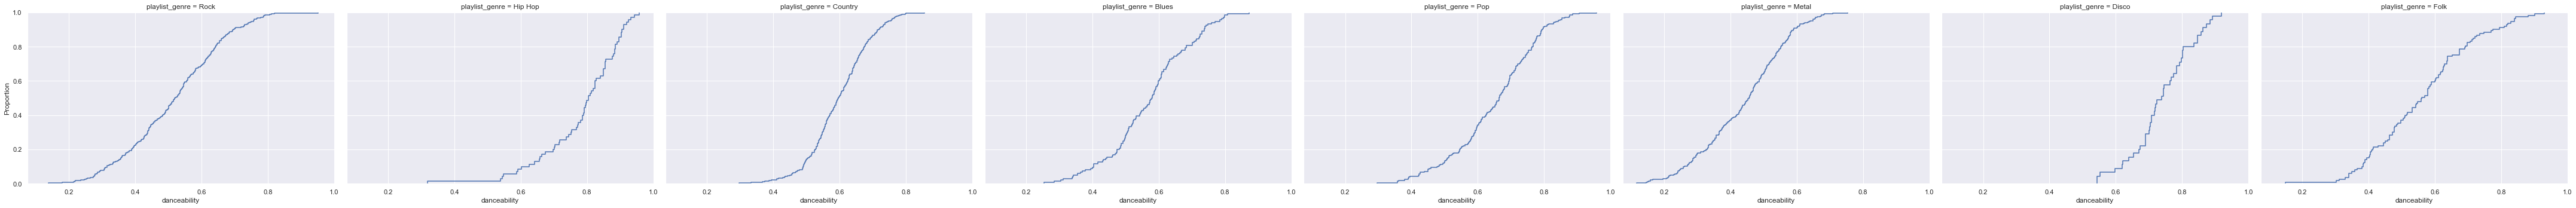

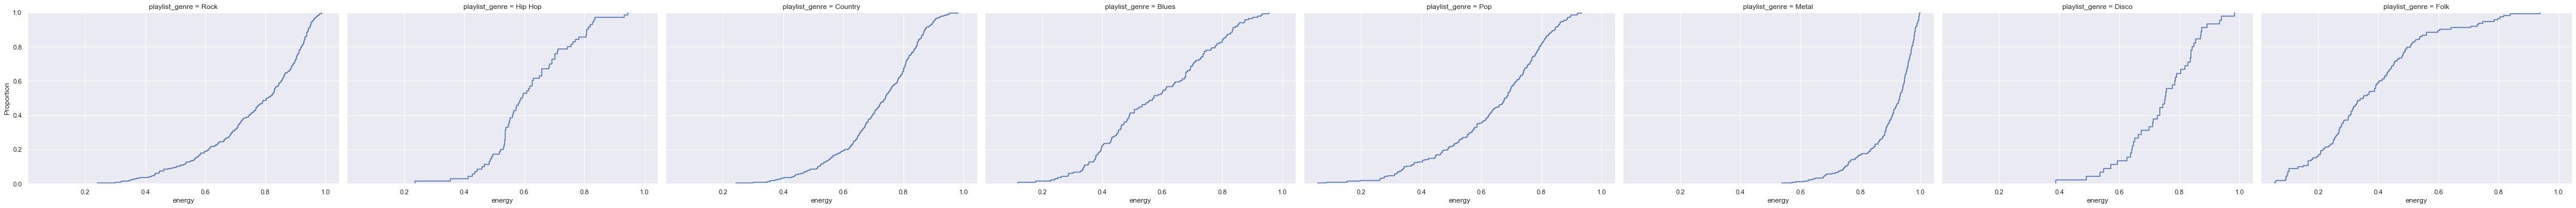

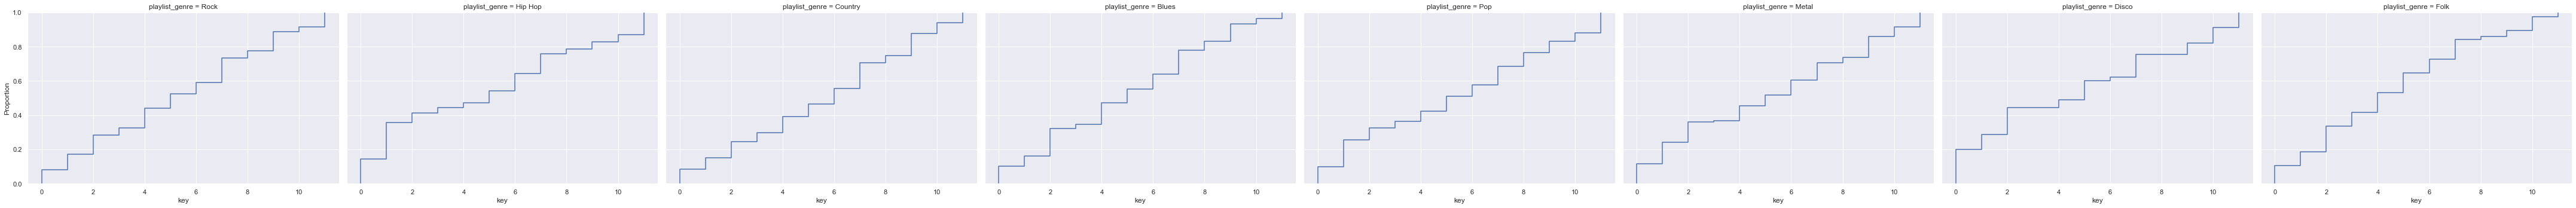

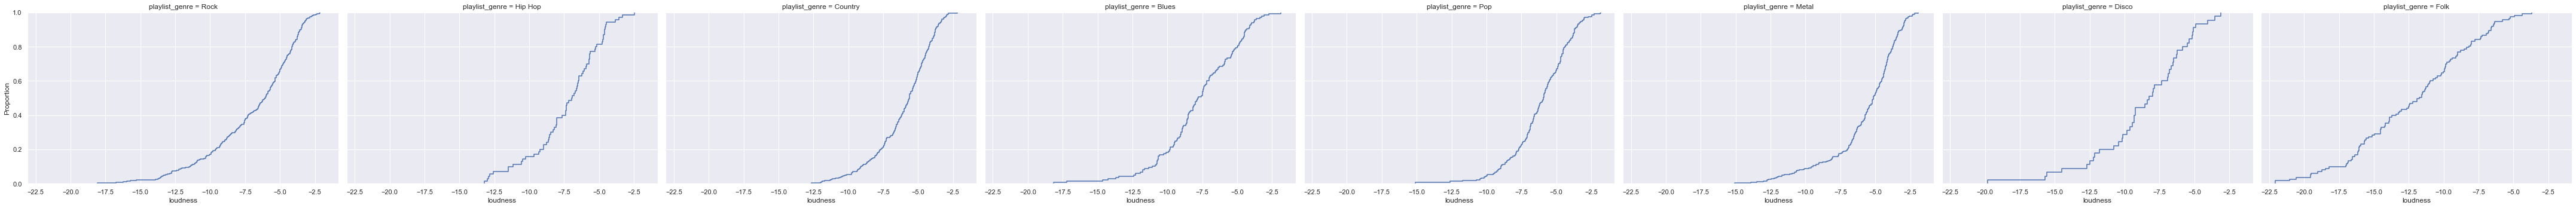

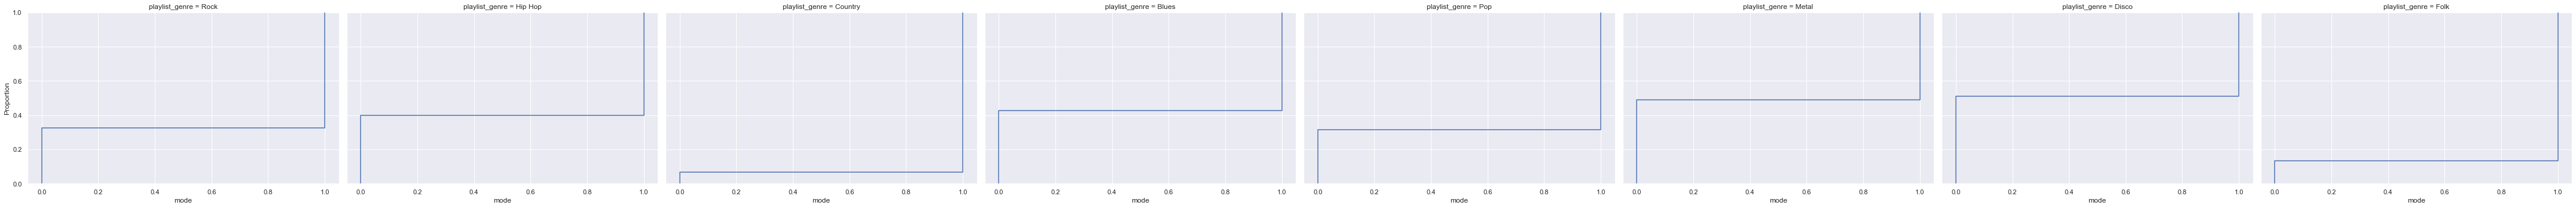

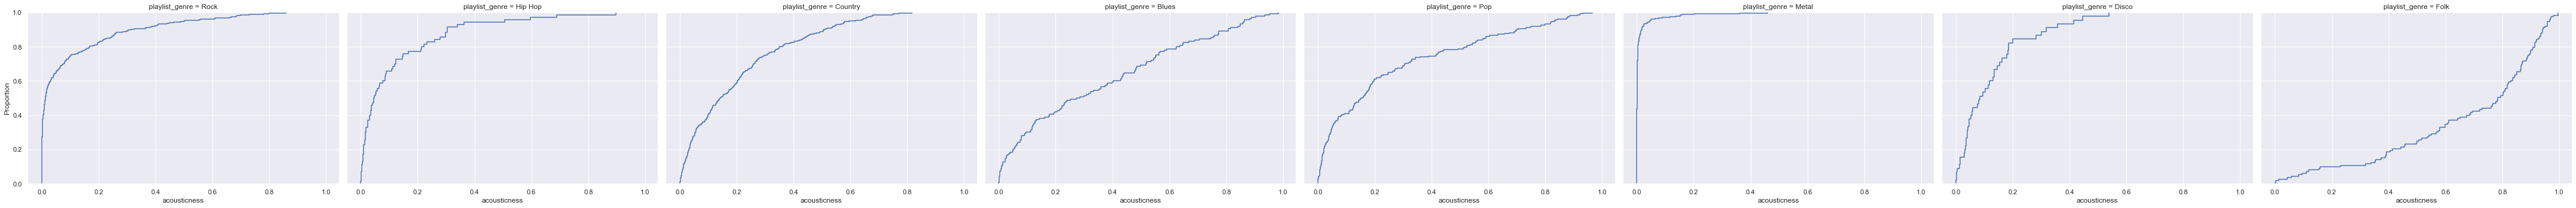

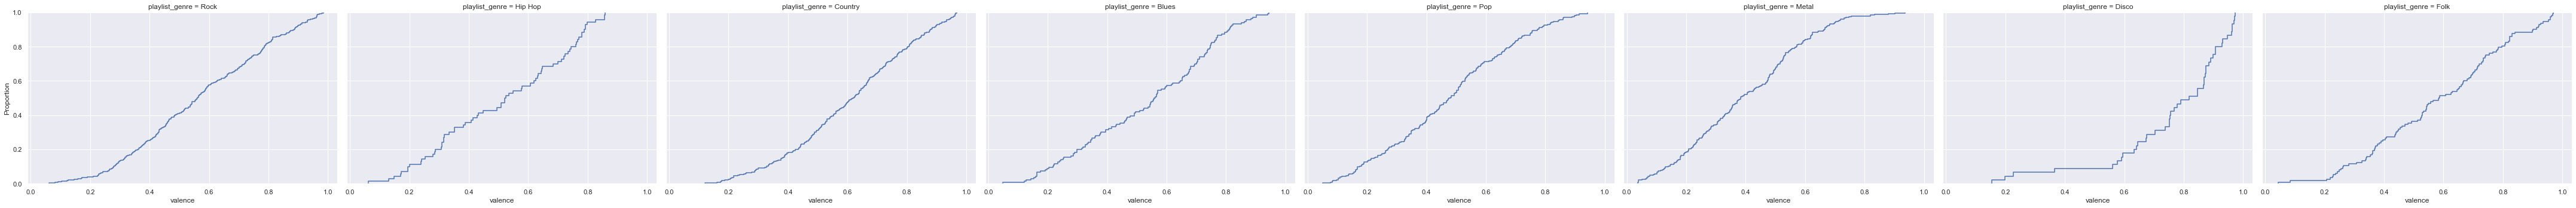

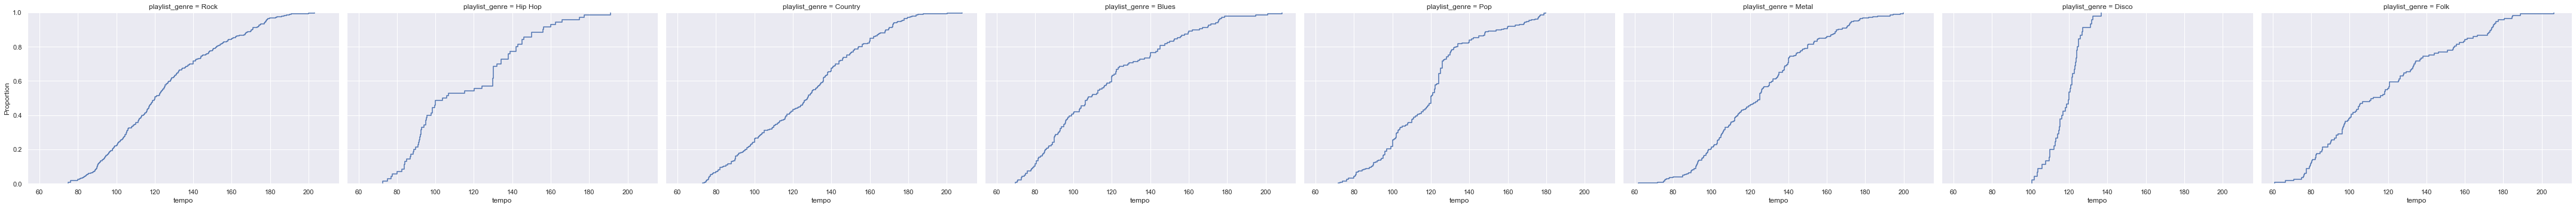

In [21]:
for var in vars:
    sns.displot(data=ldf, x=var, col='playlist_genre', kind='ecdf', aspect=1.5)

### QQ plot for normality

Source - https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

danceability


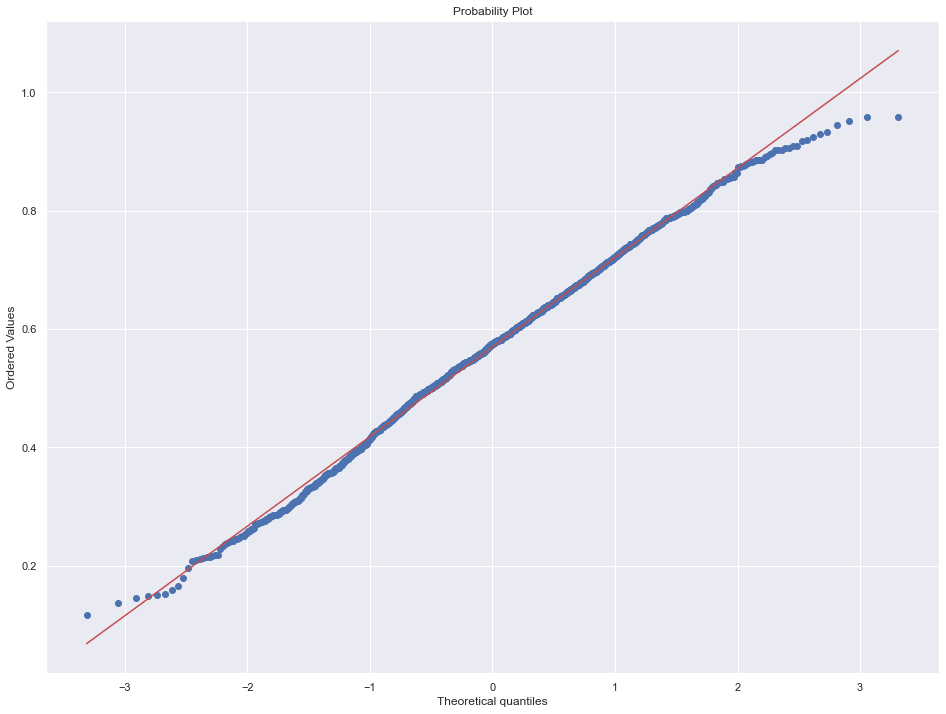

energy


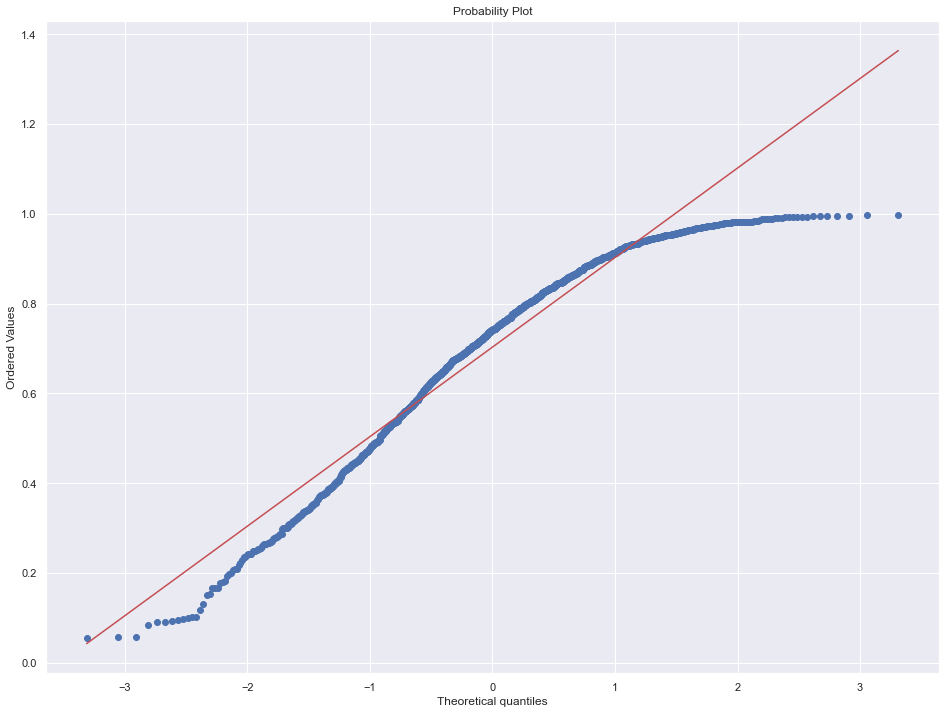

key


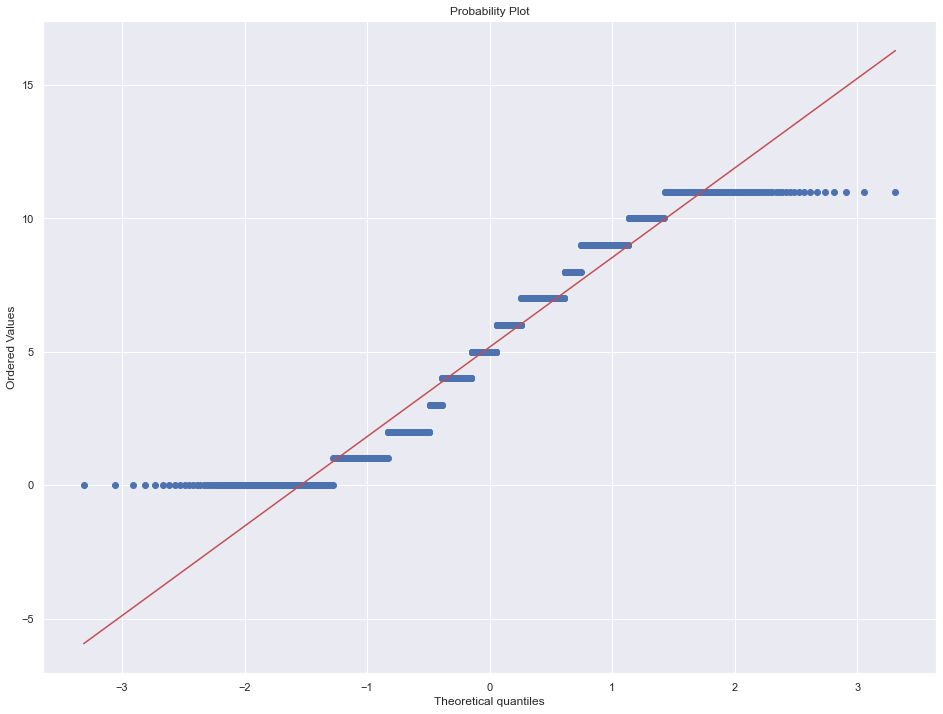

loudness


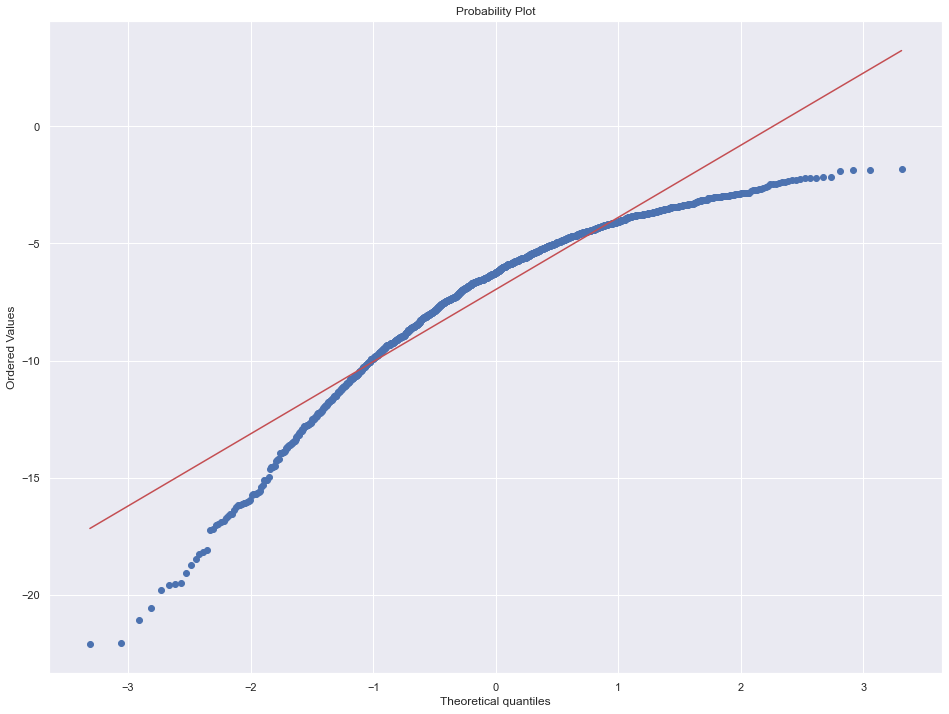

mode


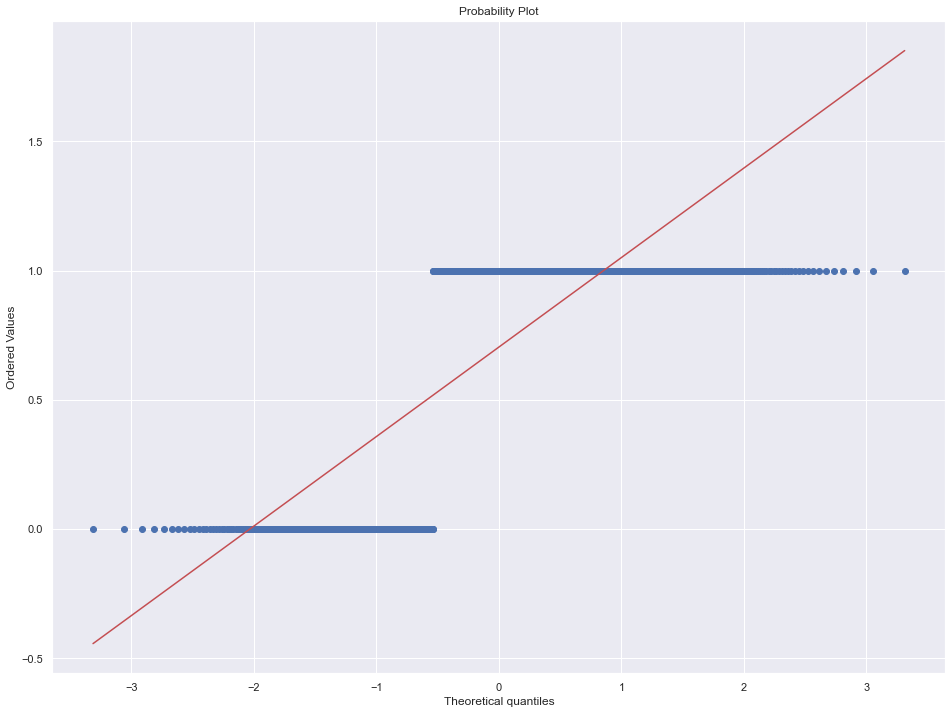

acousticness


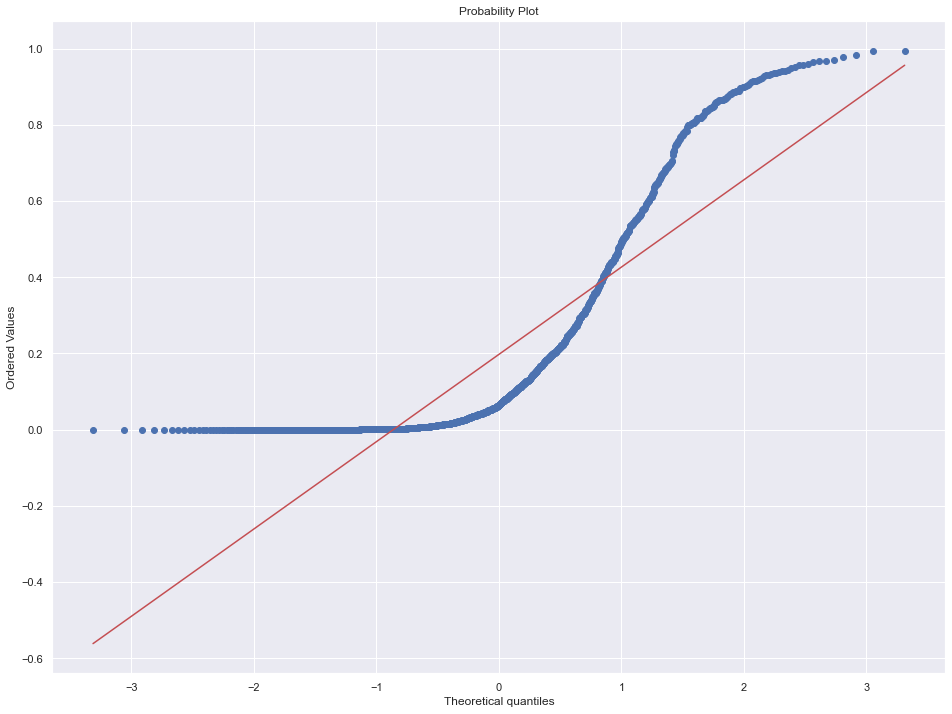

valence


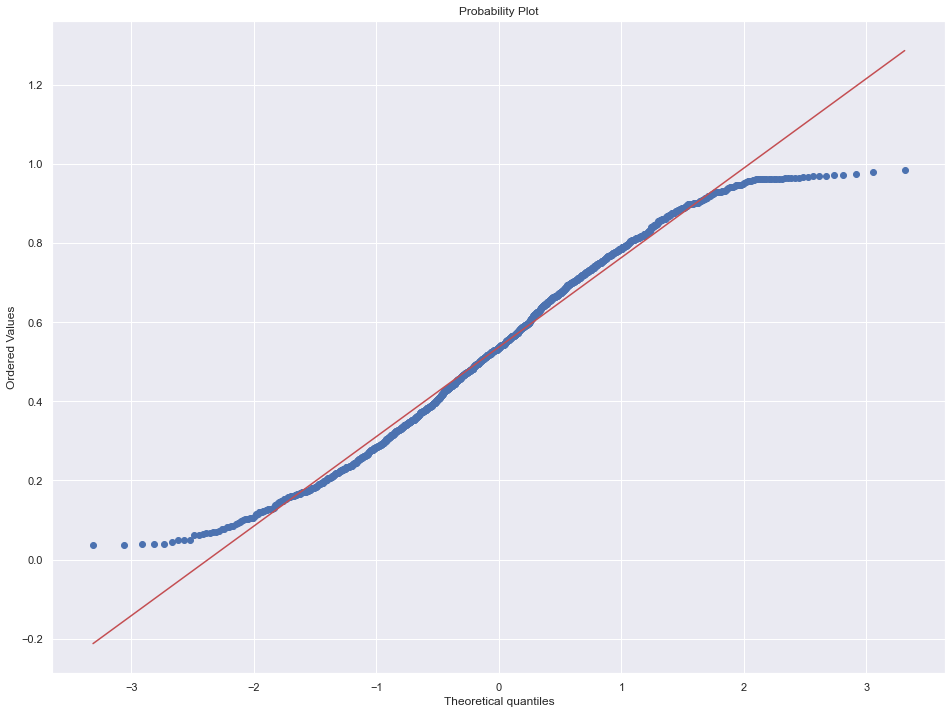

tempo


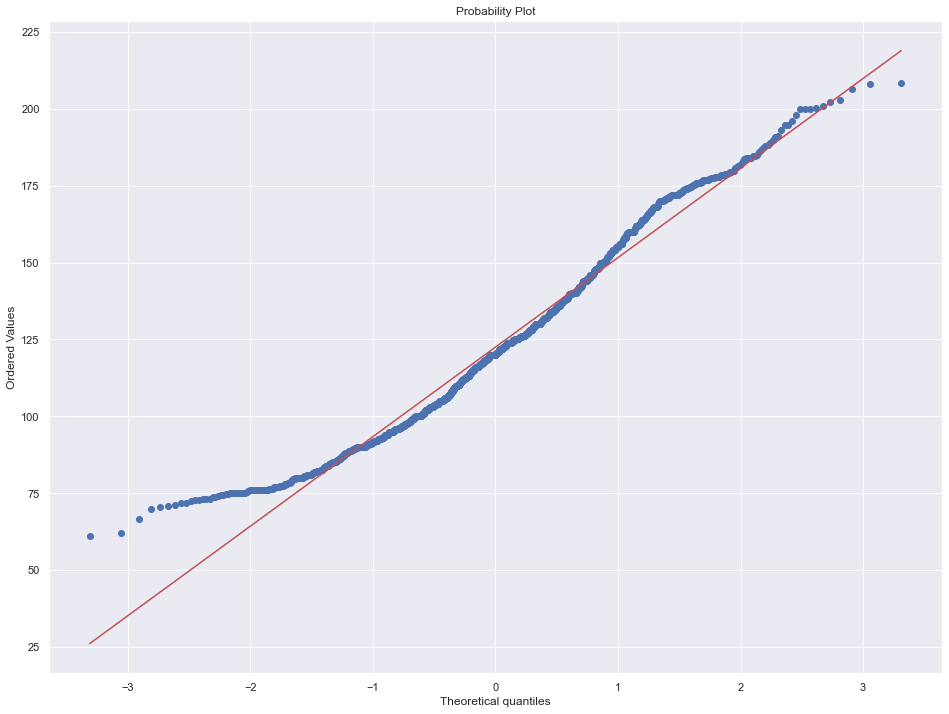

In [22]:
for var in vars:
    print(var)
    stats.probplot(ldf[var], dist="norm", plot=pylab)
    pylab.show()

### Fitting Distributions

Source:

1. https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [23]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [24]:
def plot_distributions(var):
    
    # Load data from statsmodels datasets
    data = ldf[var]
    
    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5,   color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_distibutions = best_fit_distribution(data, 200, ax)
    best_dist = best_distibutions[0]

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(var+u'All Fitted Distributions')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

    # Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title(var + u'with best fit distribution \n' + dist_str)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

#### plotting for continuous vars 

danceability
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgaus

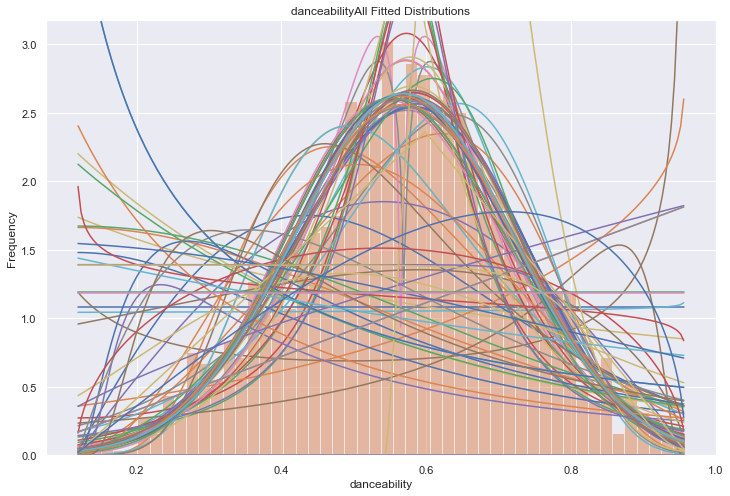

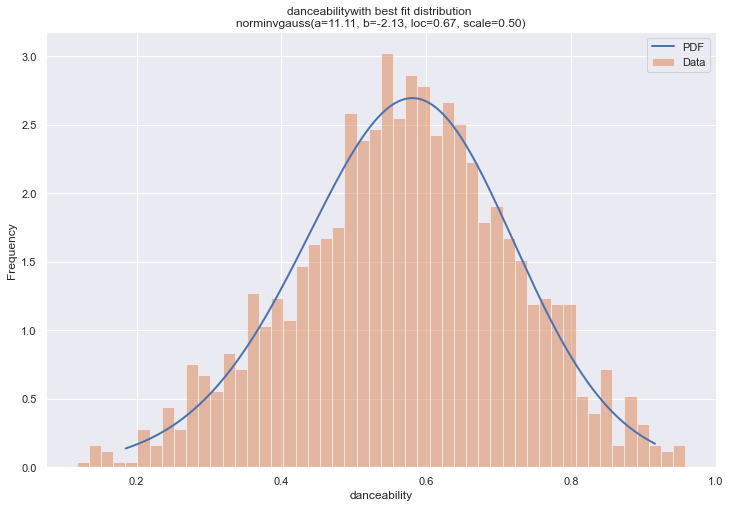

In [25]:
print(vars[0])
plot_distributions(vars[0])

energy
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 

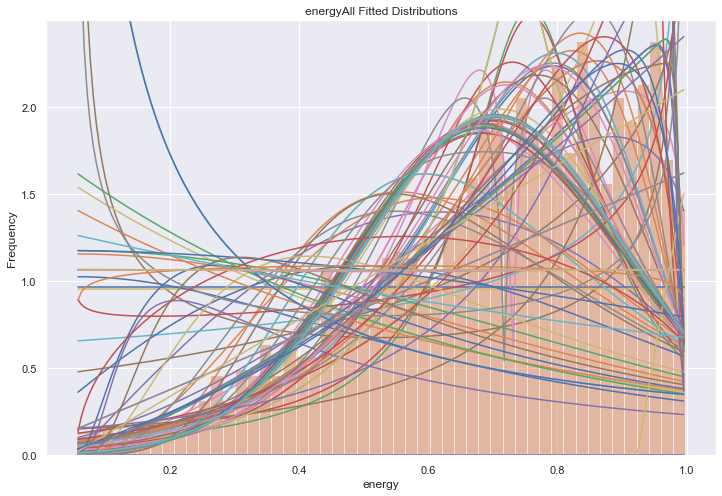

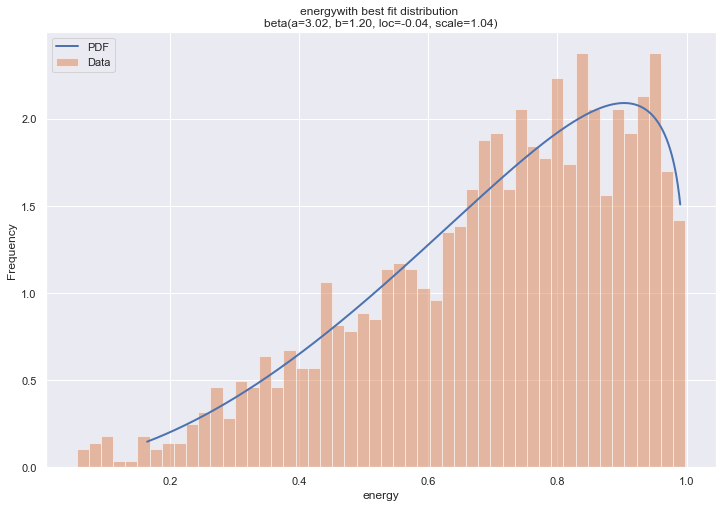

In [26]:
print(vars[1])
plot_distributions(vars[1])

loudness
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 5

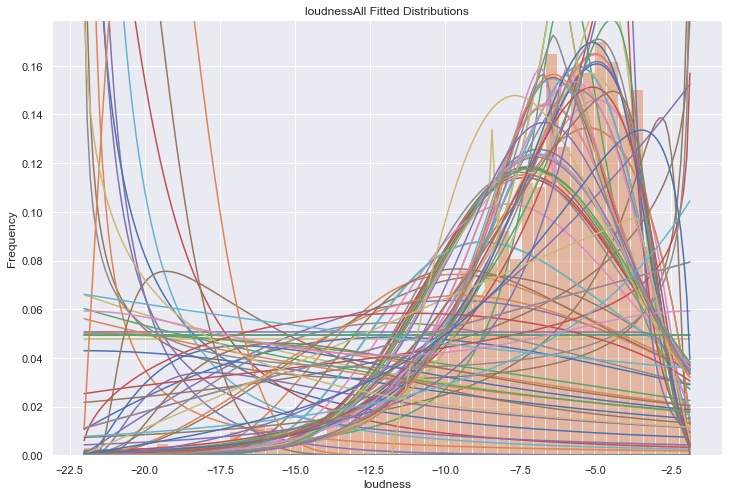

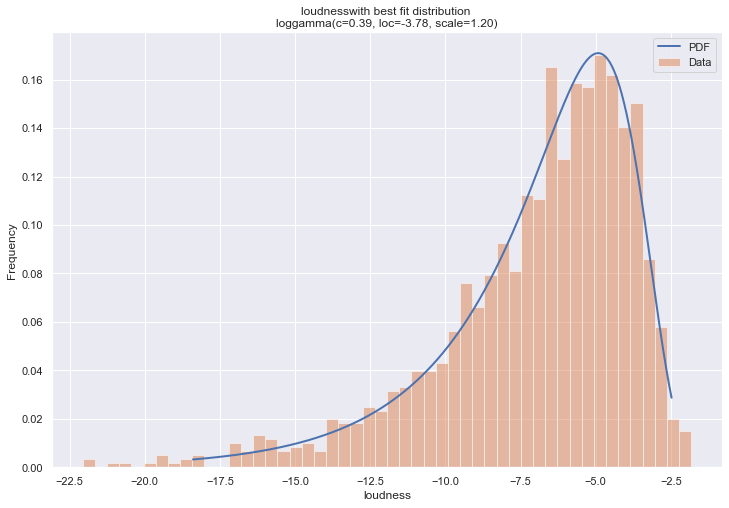

In [27]:
print(vars[3])
plot_distributions(vars[3])

acousticness
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgaus

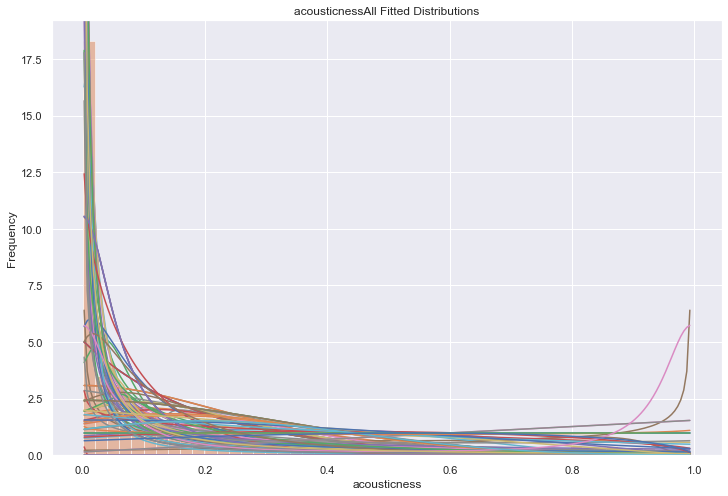

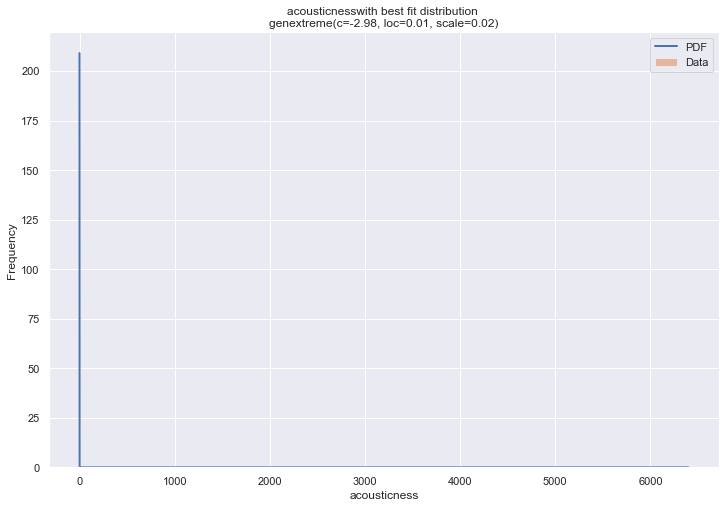

In [28]:
print(vars[5])
plot_distributions(vars[5])

valence
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51

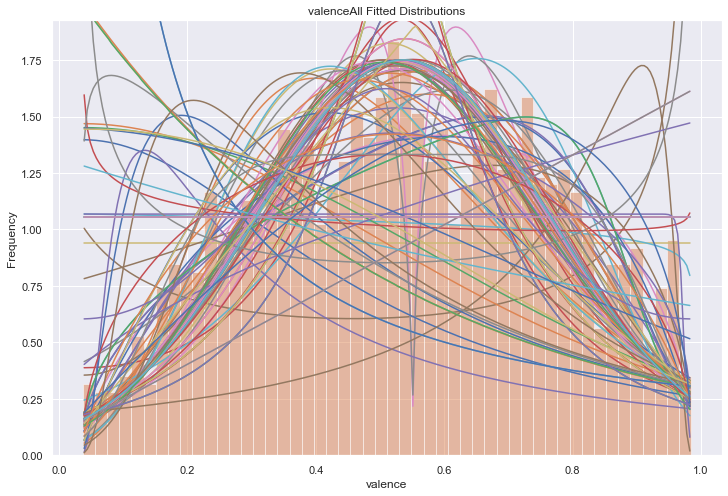

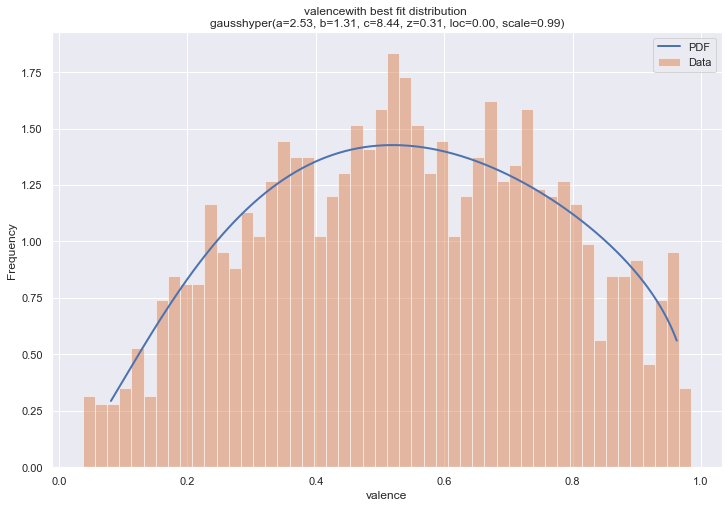

In [29]:
print(vars[6])
plot_distributions(vars[6])